The problem statment of this is project is to create a model that predicts the handwritten digit using pytorch a python deep learning framework.

The MNIST dataset consists of 60,000 images of hand written digit. Where each image has size 28X28.The MNIST stands for Modified National institute of standard and technology. It consists of 10 different classes ranging from 0–9 . It means the problem we are going to approach is multiclass classification problem. On this Blog you will understand the basic Pytorch implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

Downloading  the dataset and also convert mnist PIL images into tensors

In [2]:
train_data = torchvision.datasets.MNIST(root = r'C:\Users\jeremiah\Desktop\MNIST', download=False,train = True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = r'C:\Users\jeremiah\Desktop\MNIST', download=False,train=False, transform=transforms.ToTensor())

**Initializing the hyper parameters to build the model**

In [3]:

input_size = 784  #28 x 28
layer1 = 200 # Size of the first hidden layer : num of perceptrons.
layer2 = 150 # Size of the second hidden layer.
layer3 = 100 # Size of the third hidden layer.
layer4 = 80 # Size of the fourth hidden layer.
out = 10  # Output layer.
batch_size = 100 #The batch size.
learning_rate = .01 # Learning rate .
epoch = 20

Loading the data that was downloaded, and also fixing the batch size and also making the training data be shuffle but the testing should not be shuffles

In [4]:
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=100)
test_loader = DataLoader(dataset=test_data, shuffle=False, batch_size=200)

Since the data batch size 100, we want to print out six of the mnist data

In [5]:
load,target = next(iter(train_loader))

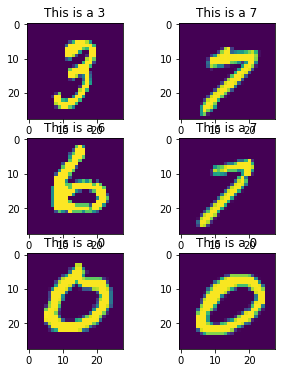

In [6]:
pize =plt.figure(figsize = (5,6))
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.imshow(load[i][0])
    plt.title(f'This is a {target[i].item()}')
    

Creating the neural network, with three convolutional layers, and 

In [7]:

class Net(nn.Module): 
    def __init__(self):
        super(Net, self).__init__()
    
        self.conv1 = nn.Conv2d(1,8, kernel_size=(3,3), padding=1, stride=1)
        #input size is 1 x28 x 28
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(8, 32, kernel_size = (3,3), padding =1, stride=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(32,64, kernel_size=(3,3), padding=1, stride=1)
        self.linear1 = nn.Linear(64*7*7, 100)
        self.linear2 = nn.Linear(100, 32)
        self.linear3 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.pool(out)
        out = self.relu(self.conv2(out))
        out = self.relu(self.pool(out))
        out = self.relu(self.conv3(out))
        out = out.view(-1, 64*7*7)
        out = self.relu(self.linear1(out))
        out = self.relu(self.linear2(out))
        out = self.linear3(out)
        return out

In [8]:
classifier = Net()

the loss function that was used is the cross entropy loss because it a multiple class classification and also the optimizer used is the Stochastic Gradient Descent (SGD)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate)
errors = []

In [10]:
#Training loop 
loss = 0
for i in range(epoch):
    for index, (img,label) in enumerate(train_loader):
        output = classifier(img)
        loss = criterion(output, label)
        #setting the gradients to zero 
        optimizer.zero_grad()
        #Calculating the gradients, Back Propagations
        loss.backward()
        #Updating the weights of the model 
        optimizer.step()
        print(f'Epoch {i}, Batch=>({index})  loss => {loss}')
    errors.append(loss)
        
        

Epoch 0, Batch=>(0)  loss => 2.307255983352661
Epoch 0, Batch=>(1)  loss => 2.3062329292297363
Epoch 0, Batch=>(2)  loss => 2.3072757720947266
Epoch 0, Batch=>(3)  loss => 2.304581880569458
Epoch 0, Batch=>(4)  loss => 2.301659345626831
Epoch 0, Batch=>(5)  loss => 2.2922186851501465
Epoch 0, Batch=>(6)  loss => 2.2958648204803467
Epoch 0, Batch=>(7)  loss => 2.3082151412963867
Epoch 0, Batch=>(8)  loss => 2.3069405555725098
Epoch 0, Batch=>(9)  loss => 2.2990856170654297
Epoch 0, Batch=>(10)  loss => 2.297560453414917
Epoch 0, Batch=>(11)  loss => 2.2961907386779785
Epoch 0, Batch=>(12)  loss => 2.3012192249298096
Epoch 0, Batch=>(13)  loss => 2.3230862617492676
Epoch 0, Batch=>(14)  loss => 2.3036608695983887
Epoch 0, Batch=>(15)  loss => 2.30036997795105
Epoch 0, Batch=>(16)  loss => 2.3122148513793945
Epoch 0, Batch=>(17)  loss => 2.2938034534454346
Epoch 0, Batch=>(18)  loss => 2.3047878742218018
Epoch 0, Batch=>(19)  loss => 2.302356481552124
Epoch 0, Batch=>(20)  loss => 2.30800

Epoch 0, Batch=>(169)  loss => 2.3105907440185547
Epoch 0, Batch=>(170)  loss => 2.303110361099243
Epoch 0, Batch=>(171)  loss => 2.3098032474517822
Epoch 0, Batch=>(172)  loss => 2.3066256046295166
Epoch 0, Batch=>(173)  loss => 2.303053617477417
Epoch 0, Batch=>(174)  loss => 2.29457688331604
Epoch 0, Batch=>(175)  loss => 2.288573741912842
Epoch 0, Batch=>(176)  loss => 2.3111534118652344
Epoch 0, Batch=>(177)  loss => 2.306762456893921
Epoch 0, Batch=>(178)  loss => 2.2993335723876953
Epoch 0, Batch=>(179)  loss => 2.297182559967041
Epoch 0, Batch=>(180)  loss => 2.311876058578491
Epoch 0, Batch=>(181)  loss => 2.311488389968872
Epoch 0, Batch=>(182)  loss => 2.311760663986206
Epoch 0, Batch=>(183)  loss => 2.301628828048706
Epoch 0, Batch=>(184)  loss => 2.3053009510040283
Epoch 0, Batch=>(185)  loss => 2.299797773361206
Epoch 0, Batch=>(186)  loss => 2.2983336448669434
Epoch 0, Batch=>(187)  loss => 2.3080177307128906
Epoch 0, Batch=>(188)  loss => 2.301156997680664
Epoch 0, Batc

Epoch 0, Batch=>(335)  loss => 2.2972981929779053
Epoch 0, Batch=>(336)  loss => 2.304302453994751
Epoch 0, Batch=>(337)  loss => 2.306033134460449
Epoch 0, Batch=>(338)  loss => 2.293691635131836
Epoch 0, Batch=>(339)  loss => 2.297851800918579
Epoch 0, Batch=>(340)  loss => 2.300076484680176
Epoch 0, Batch=>(341)  loss => 2.288884162902832
Epoch 0, Batch=>(342)  loss => 2.295325756072998
Epoch 0, Batch=>(343)  loss => 2.303743362426758
Epoch 0, Batch=>(344)  loss => 2.296626329421997
Epoch 0, Batch=>(345)  loss => 2.3020009994506836
Epoch 0, Batch=>(346)  loss => 2.2989728450775146
Epoch 0, Batch=>(347)  loss => 2.300802707672119
Epoch 0, Batch=>(348)  loss => 2.301804542541504
Epoch 0, Batch=>(349)  loss => 2.295813798904419
Epoch 0, Batch=>(350)  loss => 2.2981581687927246
Epoch 0, Batch=>(351)  loss => 2.305755138397217
Epoch 0, Batch=>(352)  loss => 2.3045427799224854
Epoch 0, Batch=>(353)  loss => 2.310891628265381
Epoch 0, Batch=>(354)  loss => 2.296468734741211
Epoch 0, Batch=

Epoch 0, Batch=>(502)  loss => 2.2929913997650146
Epoch 0, Batch=>(503)  loss => 2.3001935482025146
Epoch 0, Batch=>(504)  loss => 2.299030303955078
Epoch 0, Batch=>(505)  loss => 2.296704053878784
Epoch 0, Batch=>(506)  loss => 2.2976982593536377
Epoch 0, Batch=>(507)  loss => 2.298375129699707
Epoch 0, Batch=>(508)  loss => 2.293698310852051
Epoch 0, Batch=>(509)  loss => 2.305270195007324
Epoch 0, Batch=>(510)  loss => 2.300361394882202
Epoch 0, Batch=>(511)  loss => 2.298705816268921
Epoch 0, Batch=>(512)  loss => 2.2946372032165527
Epoch 0, Batch=>(513)  loss => 2.297328233718872
Epoch 0, Batch=>(514)  loss => 2.2996904850006104
Epoch 0, Batch=>(515)  loss => 2.29288387298584
Epoch 0, Batch=>(516)  loss => 2.2957489490509033
Epoch 0, Batch=>(517)  loss => 2.2936835289001465
Epoch 0, Batch=>(518)  loss => 2.291391134262085
Epoch 0, Batch=>(519)  loss => 2.3026506900787354
Epoch 0, Batch=>(520)  loss => 2.2955050468444824
Epoch 0, Batch=>(521)  loss => 2.2961678504943848
Epoch 0, Ba

Epoch 1, Batch=>(70)  loss => 2.2933051586151123
Epoch 1, Batch=>(71)  loss => 2.2999494075775146
Epoch 1, Batch=>(72)  loss => 2.294375419616699
Epoch 1, Batch=>(73)  loss => 2.2966785430908203
Epoch 1, Batch=>(74)  loss => 2.301478624343872
Epoch 1, Batch=>(75)  loss => 2.292691230773926
Epoch 1, Batch=>(76)  loss => 2.286999464035034
Epoch 1, Batch=>(77)  loss => 2.2979843616485596
Epoch 1, Batch=>(78)  loss => 2.296570301055908
Epoch 1, Batch=>(79)  loss => 2.2972819805145264
Epoch 1, Batch=>(80)  loss => 2.3017754554748535
Epoch 1, Batch=>(81)  loss => 2.3009374141693115
Epoch 1, Batch=>(82)  loss => 2.2953193187713623
Epoch 1, Batch=>(83)  loss => 2.3074214458465576
Epoch 1, Batch=>(84)  loss => 2.2980153560638428
Epoch 1, Batch=>(85)  loss => 2.3061423301696777
Epoch 1, Batch=>(86)  loss => 2.302995204925537
Epoch 1, Batch=>(87)  loss => 2.2912185192108154
Epoch 1, Batch=>(88)  loss => 2.2984604835510254
Epoch 1, Batch=>(89)  loss => 2.2980289459228516
Epoch 1, Batch=>(90)  loss

Epoch 1, Batch=>(237)  loss => 2.290311574935913
Epoch 1, Batch=>(238)  loss => 2.2962377071380615
Epoch 1, Batch=>(239)  loss => 2.2888545989990234
Epoch 1, Batch=>(240)  loss => 2.2937135696411133
Epoch 1, Batch=>(241)  loss => 2.290527582168579
Epoch 1, Batch=>(242)  loss => 2.2930164337158203
Epoch 1, Batch=>(243)  loss => 2.297893762588501
Epoch 1, Batch=>(244)  loss => 2.2901291847229004
Epoch 1, Batch=>(245)  loss => 2.2978339195251465
Epoch 1, Batch=>(246)  loss => 2.2904744148254395
Epoch 1, Batch=>(247)  loss => 2.300358533859253
Epoch 1, Batch=>(248)  loss => 2.2995805740356445
Epoch 1, Batch=>(249)  loss => 2.2955548763275146
Epoch 1, Batch=>(250)  loss => 2.2966344356536865
Epoch 1, Batch=>(251)  loss => 2.287614583969116
Epoch 1, Batch=>(252)  loss => 2.303037166595459
Epoch 1, Batch=>(253)  loss => 2.2941083908081055
Epoch 1, Batch=>(254)  loss => 2.295517921447754
Epoch 1, Batch=>(255)  loss => 2.2867071628570557
Epoch 1, Batch=>(256)  loss => 2.281852960586548
Epoch 1,

Epoch 1, Batch=>(405)  loss => 2.2922377586364746
Epoch 1, Batch=>(406)  loss => 2.2945244312286377
Epoch 1, Batch=>(407)  loss => 2.2898049354553223
Epoch 1, Batch=>(408)  loss => 2.2931113243103027
Epoch 1, Batch=>(409)  loss => 2.2904672622680664
Epoch 1, Batch=>(410)  loss => 2.2873430252075195
Epoch 1, Batch=>(411)  loss => 2.285928964614868
Epoch 1, Batch=>(412)  loss => 2.2928590774536133
Epoch 1, Batch=>(413)  loss => 2.292038917541504
Epoch 1, Batch=>(414)  loss => 2.2910661697387695
Epoch 1, Batch=>(415)  loss => 2.29262113571167
Epoch 1, Batch=>(416)  loss => 2.292083978652954
Epoch 1, Batch=>(417)  loss => 2.2899179458618164
Epoch 1, Batch=>(418)  loss => 2.2774839401245117
Epoch 1, Batch=>(419)  loss => 2.2925195693969727
Epoch 1, Batch=>(420)  loss => 2.2848141193389893
Epoch 1, Batch=>(421)  loss => 2.279735803604126
Epoch 1, Batch=>(422)  loss => 2.291006088256836
Epoch 1, Batch=>(423)  loss => 2.29506778717041
Epoch 1, Batch=>(424)  loss => 2.29178786277771
Epoch 1, Ba

Epoch 1, Batch=>(572)  loss => 2.2742490768432617
Epoch 1, Batch=>(573)  loss => 2.2720985412597656
Epoch 1, Batch=>(574)  loss => 2.270906448364258
Epoch 1, Batch=>(575)  loss => 2.2691361904144287
Epoch 1, Batch=>(576)  loss => 2.267993688583374
Epoch 1, Batch=>(577)  loss => 2.28225040435791
Epoch 1, Batch=>(578)  loss => 2.2820322513580322
Epoch 1, Batch=>(579)  loss => 2.288184404373169
Epoch 1, Batch=>(580)  loss => 2.2801027297973633
Epoch 1, Batch=>(581)  loss => 2.283676862716675
Epoch 1, Batch=>(582)  loss => 2.2879319190979004
Epoch 1, Batch=>(583)  loss => 2.292173385620117
Epoch 1, Batch=>(584)  loss => 2.2849717140197754
Epoch 1, Batch=>(585)  loss => 2.284886121749878
Epoch 1, Batch=>(586)  loss => 2.278088331222534
Epoch 1, Batch=>(587)  loss => 2.2765989303588867
Epoch 1, Batch=>(588)  loss => 2.2826201915740967
Epoch 1, Batch=>(589)  loss => 2.281397581100464
Epoch 1, Batch=>(590)  loss => 2.2701942920684814
Epoch 1, Batch=>(591)  loss => 2.282845973968506
Epoch 1, Ba

Epoch 2, Batch=>(140)  loss => 2.258192539215088
Epoch 2, Batch=>(141)  loss => 2.2631304264068604
Epoch 2, Batch=>(142)  loss => 2.2754666805267334
Epoch 2, Batch=>(143)  loss => 2.265174150466919
Epoch 2, Batch=>(144)  loss => 2.250476837158203
Epoch 2, Batch=>(145)  loss => 2.2494354248046875
Epoch 2, Batch=>(146)  loss => 2.273421049118042
Epoch 2, Batch=>(147)  loss => 2.267538070678711
Epoch 2, Batch=>(148)  loss => 2.257481336593628
Epoch 2, Batch=>(149)  loss => 2.2598681449890137
Epoch 2, Batch=>(150)  loss => 2.25544810295105
Epoch 2, Batch=>(151)  loss => 2.2685534954071045
Epoch 2, Batch=>(152)  loss => 2.2749979496002197
Epoch 2, Batch=>(153)  loss => 2.2545669078826904
Epoch 2, Batch=>(154)  loss => 2.261465549468994
Epoch 2, Batch=>(155)  loss => 2.2694251537323
Epoch 2, Batch=>(156)  loss => 2.2634215354919434
Epoch 2, Batch=>(157)  loss => 2.260401964187622
Epoch 2, Batch=>(158)  loss => 2.260636329650879
Epoch 2, Batch=>(159)  loss => 2.2701215744018555
Epoch 2, Batch

Epoch 2, Batch=>(307)  loss => 2.2014572620391846
Epoch 2, Batch=>(308)  loss => 2.194593667984009
Epoch 2, Batch=>(309)  loss => 2.2151169776916504
Epoch 2, Batch=>(310)  loss => 2.194324254989624
Epoch 2, Batch=>(311)  loss => 2.2186951637268066
Epoch 2, Batch=>(312)  loss => 2.2186734676361084
Epoch 2, Batch=>(313)  loss => 2.2065961360931396
Epoch 2, Batch=>(314)  loss => 2.225245714187622
Epoch 2, Batch=>(315)  loss => 2.2005698680877686
Epoch 2, Batch=>(316)  loss => 2.189878463745117
Epoch 2, Batch=>(317)  loss => 2.2117719650268555
Epoch 2, Batch=>(318)  loss => 2.2164430618286133
Epoch 2, Batch=>(319)  loss => 2.198256015777588
Epoch 2, Batch=>(320)  loss => 2.2093467712402344
Epoch 2, Batch=>(321)  loss => 2.209304094314575
Epoch 2, Batch=>(322)  loss => 2.1836698055267334
Epoch 2, Batch=>(323)  loss => 2.1990442276000977
Epoch 2, Batch=>(324)  loss => 2.2016444206237793
Epoch 2, Batch=>(325)  loss => 2.208949089050293
Epoch 2, Batch=>(326)  loss => 2.205148220062256
Epoch 2,

Epoch 2, Batch=>(474)  loss => 1.9217311143875122
Epoch 2, Batch=>(475)  loss => 1.9390963315963745
Epoch 2, Batch=>(476)  loss => 1.916542649269104
Epoch 2, Batch=>(477)  loss => 1.9061522483825684
Epoch 2, Batch=>(478)  loss => 1.9058130979537964
Epoch 2, Batch=>(479)  loss => 1.8556163311004639
Epoch 2, Batch=>(480)  loss => 1.8528376817703247
Epoch 2, Batch=>(481)  loss => 1.8834242820739746
Epoch 2, Batch=>(482)  loss => 1.866820216178894
Epoch 2, Batch=>(483)  loss => 1.850236415863037
Epoch 2, Batch=>(484)  loss => 1.8936465978622437
Epoch 2, Batch=>(485)  loss => 1.8839044570922852
Epoch 2, Batch=>(486)  loss => 1.9259305000305176
Epoch 2, Batch=>(487)  loss => 1.8666268587112427
Epoch 2, Batch=>(488)  loss => 1.8854588270187378
Epoch 2, Batch=>(489)  loss => 1.8367878198623657
Epoch 2, Batch=>(490)  loss => 1.8234330415725708
Epoch 2, Batch=>(491)  loss => 1.821291446685791
Epoch 2, Batch=>(492)  loss => 1.8340237140655518
Epoch 2, Batch=>(493)  loss => 1.833982229232788
Epoch

Epoch 3, Batch=>(40)  loss => 0.8728969097137451
Epoch 3, Batch=>(41)  loss => 0.8656896352767944
Epoch 3, Batch=>(42)  loss => 0.825101912021637
Epoch 3, Batch=>(43)  loss => 0.9566961526870728
Epoch 3, Batch=>(44)  loss => 0.9258291721343994
Epoch 3, Batch=>(45)  loss => 0.8347219228744507
Epoch 3, Batch=>(46)  loss => 0.8326846957206726
Epoch 3, Batch=>(47)  loss => 1.0089699029922485
Epoch 3, Batch=>(48)  loss => 0.9732660055160522
Epoch 3, Batch=>(49)  loss => 0.9184653759002686
Epoch 3, Batch=>(50)  loss => 0.9446336627006531
Epoch 3, Batch=>(51)  loss => 0.8520488739013672
Epoch 3, Batch=>(52)  loss => 0.9328871965408325
Epoch 3, Batch=>(53)  loss => 0.9666691422462463
Epoch 3, Batch=>(54)  loss => 0.9306071996688843
Epoch 3, Batch=>(55)  loss => 0.9932618737220764
Epoch 3, Batch=>(56)  loss => 1.000849723815918
Epoch 3, Batch=>(57)  loss => 1.0305771827697754
Epoch 3, Batch=>(58)  loss => 1.2424397468566895
Epoch 3, Batch=>(59)  loss => 1.0807136297225952
Epoch 3, Batch=>(60)  

Epoch 3, Batch=>(206)  loss => 0.7282584309577942
Epoch 3, Batch=>(207)  loss => 0.7519444823265076
Epoch 3, Batch=>(208)  loss => 0.8393409252166748
Epoch 3, Batch=>(209)  loss => 0.6114182472229004
Epoch 3, Batch=>(210)  loss => 0.6332747936248779
Epoch 3, Batch=>(211)  loss => 0.6651008725166321
Epoch 3, Batch=>(212)  loss => 0.5856097936630249
Epoch 3, Batch=>(213)  loss => 0.637611448764801
Epoch 3, Batch=>(214)  loss => 0.7397657036781311
Epoch 3, Batch=>(215)  loss => 0.7951712012290955
Epoch 3, Batch=>(216)  loss => 0.6450569033622742
Epoch 3, Batch=>(217)  loss => 0.8499475717544556
Epoch 3, Batch=>(218)  loss => 0.7655053734779358
Epoch 3, Batch=>(219)  loss => 0.779188871383667
Epoch 3, Batch=>(220)  loss => 0.7626761794090271
Epoch 3, Batch=>(221)  loss => 0.6724709868431091
Epoch 3, Batch=>(222)  loss => 0.6281435489654541
Epoch 3, Batch=>(223)  loss => 0.7119085192680359
Epoch 3, Batch=>(224)  loss => 0.5233299732208252
Epoch 3, Batch=>(225)  loss => 0.6102981567382812
Ep

Epoch 3, Batch=>(371)  loss => 0.3873482942581177
Epoch 3, Batch=>(372)  loss => 0.44694453477859497
Epoch 3, Batch=>(373)  loss => 0.5080581307411194
Epoch 3, Batch=>(374)  loss => 0.4787542223930359
Epoch 3, Batch=>(375)  loss => 0.4818432629108429
Epoch 3, Batch=>(376)  loss => 0.558607280254364
Epoch 3, Batch=>(377)  loss => 0.5126813650131226
Epoch 3, Batch=>(378)  loss => 0.5028491020202637
Epoch 3, Batch=>(379)  loss => 0.46007439494132996
Epoch 3, Batch=>(380)  loss => 0.4508085250854492
Epoch 3, Batch=>(381)  loss => 0.4053558111190796
Epoch 3, Batch=>(382)  loss => 0.5709924697875977
Epoch 3, Batch=>(383)  loss => 0.5817368626594543
Epoch 3, Batch=>(384)  loss => 0.5017051100730896
Epoch 3, Batch=>(385)  loss => 0.4707508981227875
Epoch 3, Batch=>(386)  loss => 0.5544412732124329
Epoch 3, Batch=>(387)  loss => 0.4364776909351349
Epoch 3, Batch=>(388)  loss => 0.6479184031486511
Epoch 3, Batch=>(389)  loss => 0.4625372588634491
Epoch 3, Batch=>(390)  loss => 0.4313012361526489

Epoch 3, Batch=>(536)  loss => 0.31658226251602173
Epoch 3, Batch=>(537)  loss => 0.508734941482544
Epoch 3, Batch=>(538)  loss => 0.4664978086948395
Epoch 3, Batch=>(539)  loss => 0.36641690135002136
Epoch 3, Batch=>(540)  loss => 0.4853837490081787
Epoch 3, Batch=>(541)  loss => 0.5071386098861694
Epoch 3, Batch=>(542)  loss => 0.7403526306152344
Epoch 3, Batch=>(543)  loss => 0.4276617169380188
Epoch 3, Batch=>(544)  loss => 0.3731399178504944
Epoch 3, Batch=>(545)  loss => 0.40035873651504517
Epoch 3, Batch=>(546)  loss => 0.5290426015853882
Epoch 3, Batch=>(547)  loss => 0.4345574975013733
Epoch 3, Batch=>(548)  loss => 0.6673815250396729
Epoch 3, Batch=>(549)  loss => 0.5200769901275635
Epoch 3, Batch=>(550)  loss => 0.4041019082069397
Epoch 3, Batch=>(551)  loss => 0.2636864185333252
Epoch 3, Batch=>(552)  loss => 0.3976427912712097
Epoch 3, Batch=>(553)  loss => 0.35110607743263245
Epoch 3, Batch=>(554)  loss => 0.4973008334636688
Epoch 3, Batch=>(555)  loss => 0.46851906180381

Epoch 4, Batch=>(103)  loss => 0.6308801174163818
Epoch 4, Batch=>(104)  loss => 0.3717552125453949
Epoch 4, Batch=>(105)  loss => 0.22146928310394287
Epoch 4, Batch=>(106)  loss => 0.45370277762413025
Epoch 4, Batch=>(107)  loss => 0.2521876096725464
Epoch 4, Batch=>(108)  loss => 0.3984459340572357
Epoch 4, Batch=>(109)  loss => 0.3769594132900238
Epoch 4, Batch=>(110)  loss => 0.5132648348808289
Epoch 4, Batch=>(111)  loss => 0.3775370121002197
Epoch 4, Batch=>(112)  loss => 0.3037937879562378
Epoch 4, Batch=>(113)  loss => 0.27002692222595215
Epoch 4, Batch=>(114)  loss => 0.4707038998603821
Epoch 4, Batch=>(115)  loss => 0.36243924498558044
Epoch 4, Batch=>(116)  loss => 0.3708932101726532
Epoch 4, Batch=>(117)  loss => 0.34948891401290894
Epoch 4, Batch=>(118)  loss => 0.3228909373283386
Epoch 4, Batch=>(119)  loss => 0.338328093290329
Epoch 4, Batch=>(120)  loss => 0.2294481098651886
Epoch 4, Batch=>(121)  loss => 0.23356181383132935
Epoch 4, Batch=>(122)  loss => 0.423623234033

Epoch 4, Batch=>(266)  loss => 0.3171338737010956
Epoch 4, Batch=>(267)  loss => 0.3291049301624298
Epoch 4, Batch=>(268)  loss => 0.4261530935764313
Epoch 4, Batch=>(269)  loss => 0.48951613903045654
Epoch 4, Batch=>(270)  loss => 0.22581256926059723
Epoch 4, Batch=>(271)  loss => 0.25533372163772583
Epoch 4, Batch=>(272)  loss => 0.2867929935455322
Epoch 4, Batch=>(273)  loss => 0.31188589334487915
Epoch 4, Batch=>(274)  loss => 0.48138228058815
Epoch 4, Batch=>(275)  loss => 0.33570823073387146
Epoch 4, Batch=>(276)  loss => 0.5571848750114441
Epoch 4, Batch=>(277)  loss => 0.39198529720306396
Epoch 4, Batch=>(278)  loss => 0.36464905738830566
Epoch 4, Batch=>(279)  loss => 0.3519417941570282
Epoch 4, Batch=>(280)  loss => 0.20510603487491608
Epoch 4, Batch=>(281)  loss => 0.4257251024246216
Epoch 4, Batch=>(282)  loss => 0.2907339334487915
Epoch 4, Batch=>(283)  loss => 0.39529117941856384
Epoch 4, Batch=>(284)  loss => 0.2989778220653534
Epoch 4, Batch=>(285)  loss => 0.2891358137

Epoch 4, Batch=>(430)  loss => 0.2064947485923767
Epoch 4, Batch=>(431)  loss => 0.2005491703748703
Epoch 4, Batch=>(432)  loss => 0.3327505588531494
Epoch 4, Batch=>(433)  loss => 0.3506835997104645
Epoch 4, Batch=>(434)  loss => 0.33434855937957764
Epoch 4, Batch=>(435)  loss => 0.37093600630760193
Epoch 4, Batch=>(436)  loss => 0.33910059928894043
Epoch 4, Batch=>(437)  loss => 0.38292738795280457
Epoch 4, Batch=>(438)  loss => 0.2963625192642212
Epoch 4, Batch=>(439)  loss => 0.2927935719490051
Epoch 4, Batch=>(440)  loss => 0.31559091806411743
Epoch 4, Batch=>(441)  loss => 0.18575866520404816
Epoch 4, Batch=>(442)  loss => 0.36548393964767456
Epoch 4, Batch=>(443)  loss => 0.3293660879135132
Epoch 4, Batch=>(444)  loss => 0.3423735499382019
Epoch 4, Batch=>(445)  loss => 0.32086506485939026
Epoch 4, Batch=>(446)  loss => 0.3167276382446289
Epoch 4, Batch=>(447)  loss => 0.4530501961708069
Epoch 4, Batch=>(448)  loss => 0.31684836745262146
Epoch 4, Batch=>(449)  loss => 0.32154071

Epoch 4, Batch=>(594)  loss => 0.2979131042957306
Epoch 4, Batch=>(595)  loss => 0.30867689847946167
Epoch 4, Batch=>(596)  loss => 0.2806895077228546
Epoch 4, Batch=>(597)  loss => 0.5217130184173584
Epoch 4, Batch=>(598)  loss => 0.33702850341796875
Epoch 4, Batch=>(599)  loss => 0.24593335390090942
Epoch 5, Batch=>(0)  loss => 0.3662077784538269
Epoch 5, Batch=>(1)  loss => 0.1454022228717804
Epoch 5, Batch=>(2)  loss => 0.2994302809238434
Epoch 5, Batch=>(3)  loss => 0.26806628704071045
Epoch 5, Batch=>(4)  loss => 0.30333369970321655
Epoch 5, Batch=>(5)  loss => 0.21673858165740967
Epoch 5, Batch=>(6)  loss => 0.20354704558849335
Epoch 5, Batch=>(7)  loss => 0.24405862390995026
Epoch 5, Batch=>(8)  loss => 0.3291454315185547
Epoch 5, Batch=>(9)  loss => 0.17552681267261505
Epoch 5, Batch=>(10)  loss => 0.1940802037715912
Epoch 5, Batch=>(11)  loss => 0.23278973996639252
Epoch 5, Batch=>(12)  loss => 0.39738544821739197
Epoch 5, Batch=>(13)  loss => 0.4087623953819275
Epoch 5, Batc

Epoch 5, Batch=>(159)  loss => 0.39373284578323364
Epoch 5, Batch=>(160)  loss => 0.284698486328125
Epoch 5, Batch=>(161)  loss => 0.34704354405403137
Epoch 5, Batch=>(162)  loss => 0.21559013426303864
Epoch 5, Batch=>(163)  loss => 0.27767905592918396
Epoch 5, Batch=>(164)  loss => 0.28964608907699585
Epoch 5, Batch=>(165)  loss => 0.32463932037353516
Epoch 5, Batch=>(166)  loss => 0.14175985753536224
Epoch 5, Batch=>(167)  loss => 0.18307377398014069
Epoch 5, Batch=>(168)  loss => 0.22069385647773743
Epoch 5, Batch=>(169)  loss => 0.3909451365470886
Epoch 5, Batch=>(170)  loss => 0.24291352927684784
Epoch 5, Batch=>(171)  loss => 0.24697750806808472
Epoch 5, Batch=>(172)  loss => 0.3003697991371155
Epoch 5, Batch=>(173)  loss => 0.38242843747138977
Epoch 5, Batch=>(174)  loss => 0.22564643621444702
Epoch 5, Batch=>(175)  loss => 0.25092190504074097
Epoch 5, Batch=>(176)  loss => 0.3037905991077423
Epoch 5, Batch=>(177)  loss => 0.3232923746109009
Epoch 5, Batch=>(178)  loss => 0.2376

Epoch 5, Batch=>(322)  loss => 0.2986243665218353
Epoch 5, Batch=>(323)  loss => 0.20359767973423004
Epoch 5, Batch=>(324)  loss => 0.24023926258087158
Epoch 5, Batch=>(325)  loss => 0.29130083322525024
Epoch 5, Batch=>(326)  loss => 0.2633950114250183
Epoch 5, Batch=>(327)  loss => 0.31610193848609924
Epoch 5, Batch=>(328)  loss => 0.1864578276872635
Epoch 5, Batch=>(329)  loss => 0.2746875584125519
Epoch 5, Batch=>(330)  loss => 0.2531624734401703
Epoch 5, Batch=>(331)  loss => 0.32103052735328674
Epoch 5, Batch=>(332)  loss => 0.32324936985969543
Epoch 5, Batch=>(333)  loss => 0.2077922224998474
Epoch 5, Batch=>(334)  loss => 0.12019345909357071
Epoch 5, Batch=>(335)  loss => 0.21418818831443787
Epoch 5, Batch=>(336)  loss => 0.2202012836933136
Epoch 5, Batch=>(337)  loss => 0.18376974761486053
Epoch 5, Batch=>(338)  loss => 0.31723806262016296
Epoch 5, Batch=>(339)  loss => 0.2149779498577118
Epoch 5, Batch=>(340)  loss => 0.2222297489643097
Epoch 5, Batch=>(341)  loss => 0.2068926

Epoch 5, Batch=>(484)  loss => 0.24092525243759155
Epoch 5, Batch=>(485)  loss => 0.13128460943698883
Epoch 5, Batch=>(486)  loss => 0.14770705997943878
Epoch 5, Batch=>(487)  loss => 0.226032555103302
Epoch 5, Batch=>(488)  loss => 0.2554139792919159
Epoch 5, Batch=>(489)  loss => 0.22486232221126556
Epoch 5, Batch=>(490)  loss => 0.24206408858299255
Epoch 5, Batch=>(491)  loss => 0.1518518477678299
Epoch 5, Batch=>(492)  loss => 0.15412107110023499
Epoch 5, Batch=>(493)  loss => 0.16051116585731506
Epoch 5, Batch=>(494)  loss => 0.3837147057056427
Epoch 5, Batch=>(495)  loss => 0.2674129009246826
Epoch 5, Batch=>(496)  loss => 0.2827221155166626
Epoch 5, Batch=>(497)  loss => 0.31413212418556213
Epoch 5, Batch=>(498)  loss => 0.19937971234321594
Epoch 5, Batch=>(499)  loss => 0.2130049169063568
Epoch 5, Batch=>(500)  loss => 0.12697815895080566
Epoch 5, Batch=>(501)  loss => 0.33958297967910767
Epoch 5, Batch=>(502)  loss => 0.2092854380607605
Epoch 5, Batch=>(503)  loss => 0.2423747

Epoch 6, Batch=>(49)  loss => 0.1772405207157135
Epoch 6, Batch=>(50)  loss => 0.23163174092769623
Epoch 6, Batch=>(51)  loss => 0.2260313630104065
Epoch 6, Batch=>(52)  loss => 0.20155981183052063
Epoch 6, Batch=>(53)  loss => 0.22006112337112427
Epoch 6, Batch=>(54)  loss => 0.19033397734165192
Epoch 6, Batch=>(55)  loss => 0.16347017884254456
Epoch 6, Batch=>(56)  loss => 0.3371777832508087
Epoch 6, Batch=>(57)  loss => 0.32031455636024475
Epoch 6, Batch=>(58)  loss => 0.26607954502105713
Epoch 6, Batch=>(59)  loss => 0.13867422938346863
Epoch 6, Batch=>(60)  loss => 0.11573539674282074
Epoch 6, Batch=>(61)  loss => 0.26659294962882996
Epoch 6, Batch=>(62)  loss => 0.22933809459209442
Epoch 6, Batch=>(63)  loss => 0.22063501179218292
Epoch 6, Batch=>(64)  loss => 0.19791525602340698
Epoch 6, Batch=>(65)  loss => 0.11923393607139587
Epoch 6, Batch=>(66)  loss => 0.1575404703617096
Epoch 6, Batch=>(67)  loss => 0.19659240543842316
Epoch 6, Batch=>(68)  loss => 0.13119742274284363
Epoc

Epoch 6, Batch=>(213)  loss => 0.09478072077035904
Epoch 6, Batch=>(214)  loss => 0.13617683947086334
Epoch 6, Batch=>(215)  loss => 0.29679611325263977
Epoch 6, Batch=>(216)  loss => 0.2623431980609894
Epoch 6, Batch=>(217)  loss => 0.11425343155860901
Epoch 6, Batch=>(218)  loss => 0.21502868831157684
Epoch 6, Batch=>(219)  loss => 0.1222277358174324
Epoch 6, Batch=>(220)  loss => 0.1402304619550705
Epoch 6, Batch=>(221)  loss => 0.23354105651378632
Epoch 6, Batch=>(222)  loss => 0.37149468064308167
Epoch 6, Batch=>(223)  loss => 0.23538902401924133
Epoch 6, Batch=>(224)  loss => 0.1709418147802353
Epoch 6, Batch=>(225)  loss => 0.14809289574623108
Epoch 6, Batch=>(226)  loss => 0.21324209868907928
Epoch 6, Batch=>(227)  loss => 0.15983285009860992
Epoch 6, Batch=>(228)  loss => 0.21371972560882568
Epoch 6, Batch=>(229)  loss => 0.25692176818847656
Epoch 6, Batch=>(230)  loss => 0.16404949128627777
Epoch 6, Batch=>(231)  loss => 0.21632736921310425
Epoch 6, Batch=>(232)  loss => 0.26

Epoch 6, Batch=>(376)  loss => 0.2329530268907547
Epoch 6, Batch=>(377)  loss => 0.354557067155838
Epoch 6, Batch=>(378)  loss => 0.1454409956932068
Epoch 6, Batch=>(379)  loss => 0.19534586369991302
Epoch 6, Batch=>(380)  loss => 0.10910572856664658
Epoch 6, Batch=>(381)  loss => 0.2109399288892746
Epoch 6, Batch=>(382)  loss => 0.17277275025844574
Epoch 6, Batch=>(383)  loss => 0.22156019508838654
Epoch 6, Batch=>(384)  loss => 0.19238567352294922
Epoch 6, Batch=>(385)  loss => 0.22810930013656616
Epoch 6, Batch=>(386)  loss => 0.18240901827812195
Epoch 6, Batch=>(387)  loss => 0.16296419501304626
Epoch 6, Batch=>(388)  loss => 0.20404618978500366
Epoch 6, Batch=>(389)  loss => 0.11962924897670746
Epoch 6, Batch=>(390)  loss => 0.16834622621536255
Epoch 6, Batch=>(391)  loss => 0.18755964934825897
Epoch 6, Batch=>(392)  loss => 0.22115720808506012
Epoch 6, Batch=>(393)  loss => 0.21453136205673218
Epoch 6, Batch=>(394)  loss => 0.06852613389492035
Epoch 6, Batch=>(395)  loss => 0.207

Epoch 6, Batch=>(538)  loss => 0.12414589524269104
Epoch 6, Batch=>(539)  loss => 0.19005462527275085
Epoch 6, Batch=>(540)  loss => 0.13559749722480774
Epoch 6, Batch=>(541)  loss => 0.19523143768310547
Epoch 6, Batch=>(542)  loss => 0.30411139130592346
Epoch 6, Batch=>(543)  loss => 0.1773683875799179
Epoch 6, Batch=>(544)  loss => 0.12913820147514343
Epoch 6, Batch=>(545)  loss => 0.12771180272102356
Epoch 6, Batch=>(546)  loss => 0.27498677372932434
Epoch 6, Batch=>(547)  loss => 0.1714106798171997
Epoch 6, Batch=>(548)  loss => 0.11486391723155975
Epoch 6, Batch=>(549)  loss => 0.25298795104026794
Epoch 6, Batch=>(550)  loss => 0.1154874712228775
Epoch 6, Batch=>(551)  loss => 0.28557804226875305
Epoch 6, Batch=>(552)  loss => 0.16941116750240326
Epoch 6, Batch=>(553)  loss => 0.10090535879135132
Epoch 6, Batch=>(554)  loss => 0.1273561418056488
Epoch 6, Batch=>(555)  loss => 0.21173065900802612
Epoch 6, Batch=>(556)  loss => 0.28008362650871277
Epoch 6, Batch=>(557)  loss => 0.20

Epoch 7, Batch=>(104)  loss => 0.1292228400707245
Epoch 7, Batch=>(105)  loss => 0.40289801359176636
Epoch 7, Batch=>(106)  loss => 0.09922739118337631
Epoch 7, Batch=>(107)  loss => 0.10951197892427444
Epoch 7, Batch=>(108)  loss => 0.2247742861509323
Epoch 7, Batch=>(109)  loss => 0.14474089443683624
Epoch 7, Batch=>(110)  loss => 0.1361752599477768
Epoch 7, Batch=>(111)  loss => 0.17692452669143677
Epoch 7, Batch=>(112)  loss => 0.14591830968856812
Epoch 7, Batch=>(113)  loss => 0.1328827440738678
Epoch 7, Batch=>(114)  loss => 0.1838540881872177
Epoch 7, Batch=>(115)  loss => 0.16093821823596954
Epoch 7, Batch=>(116)  loss => 0.20781412720680237
Epoch 7, Batch=>(117)  loss => 0.08062544465065002
Epoch 7, Batch=>(118)  loss => 0.10818395018577576
Epoch 7, Batch=>(119)  loss => 0.133399099111557
Epoch 7, Batch=>(120)  loss => 0.3329237699508667
Epoch 7, Batch=>(121)  loss => 0.2991519272327423
Epoch 7, Batch=>(122)  loss => 0.10984223335981369
Epoch 7, Batch=>(123)  loss => 0.0786145

Epoch 7, Batch=>(267)  loss => 0.21561072766780853
Epoch 7, Batch=>(268)  loss => 0.24604782462120056
Epoch 7, Batch=>(269)  loss => 0.26772814989089966
Epoch 7, Batch=>(270)  loss => 0.16157887876033783
Epoch 7, Batch=>(271)  loss => 0.12415383011102676
Epoch 7, Batch=>(272)  loss => 0.11061488837003708
Epoch 7, Batch=>(273)  loss => 0.07314030826091766
Epoch 7, Batch=>(274)  loss => 0.13754276931285858
Epoch 7, Batch=>(275)  loss => 0.17718206346035004
Epoch 7, Batch=>(276)  loss => 0.34529370069503784
Epoch 7, Batch=>(277)  loss => 0.16730594635009766
Epoch 7, Batch=>(278)  loss => 0.2479707896709442
Epoch 7, Batch=>(279)  loss => 0.22383376955986023
Epoch 7, Batch=>(280)  loss => 0.071210116147995
Epoch 7, Batch=>(281)  loss => 0.13001851737499237
Epoch 7, Batch=>(282)  loss => 0.18190880119800568
Epoch 7, Batch=>(283)  loss => 0.25230932235717773
Epoch 7, Batch=>(284)  loss => 0.12180239707231522
Epoch 7, Batch=>(285)  loss => 0.12726622819900513
Epoch 7, Batch=>(286)  loss => 0.0

Epoch 7, Batch=>(429)  loss => 0.23868167400360107
Epoch 7, Batch=>(430)  loss => 0.12747184932231903
Epoch 7, Batch=>(431)  loss => 0.23619787395000458
Epoch 7, Batch=>(432)  loss => 0.11470381915569305
Epoch 7, Batch=>(433)  loss => 0.22970953583717346
Epoch 7, Batch=>(434)  loss => 0.1855003386735916
Epoch 7, Batch=>(435)  loss => 0.1223539188504219
Epoch 7, Batch=>(436)  loss => 0.0907403752207756
Epoch 7, Batch=>(437)  loss => 0.15248334407806396
Epoch 7, Batch=>(438)  loss => 0.08736167103052139
Epoch 7, Batch=>(439)  loss => 0.1073240116238594
Epoch 7, Batch=>(440)  loss => 0.18367943167686462
Epoch 7, Batch=>(441)  loss => 0.1552848517894745
Epoch 7, Batch=>(442)  loss => 0.2040531188249588
Epoch 7, Batch=>(443)  loss => 0.14165686070919037
Epoch 7, Batch=>(444)  loss => 0.13836121559143066
Epoch 7, Batch=>(445)  loss => 0.14242680370807648
Epoch 7, Batch=>(446)  loss => 0.1851588785648346
Epoch 7, Batch=>(447)  loss => 0.3391178250312805
Epoch 7, Batch=>(448)  loss => 0.172744

Epoch 7, Batch=>(591)  loss => 0.1307218223810196
Epoch 7, Batch=>(592)  loss => 0.10778427124023438
Epoch 7, Batch=>(593)  loss => 0.12581712007522583
Epoch 7, Batch=>(594)  loss => 0.09622954577207565
Epoch 7, Batch=>(595)  loss => 0.13444392383098602
Epoch 7, Batch=>(596)  loss => 0.12988094985485077
Epoch 7, Batch=>(597)  loss => 0.09850523620843887
Epoch 7, Batch=>(598)  loss => 0.3278983235359192
Epoch 7, Batch=>(599)  loss => 0.17943482100963593
Epoch 8, Batch=>(0)  loss => 0.3022681772708893
Epoch 8, Batch=>(1)  loss => 0.08630945533514023
Epoch 8, Batch=>(2)  loss => 0.21884895861148834
Epoch 8, Batch=>(3)  loss => 0.12808437645435333
Epoch 8, Batch=>(4)  loss => 0.25892573595046997
Epoch 8, Batch=>(5)  loss => 0.19093085825443268
Epoch 8, Batch=>(6)  loss => 0.216591477394104
Epoch 8, Batch=>(7)  loss => 0.11946794390678406
Epoch 8, Batch=>(8)  loss => 0.1130606159567833
Epoch 8, Batch=>(9)  loss => 0.1025443747639656
Epoch 8, Batch=>(10)  loss => 0.11155016720294952
Epoch 8,

Epoch 8, Batch=>(155)  loss => 0.20549876987934113
Epoch 8, Batch=>(156)  loss => 0.09645376354455948
Epoch 8, Batch=>(157)  loss => 0.10762201249599457
Epoch 8, Batch=>(158)  loss => 0.14655019342899323
Epoch 8, Batch=>(159)  loss => 0.04912504553794861
Epoch 8, Batch=>(160)  loss => 0.126737579703331
Epoch 8, Batch=>(161)  loss => 0.2314203381538391
Epoch 8, Batch=>(162)  loss => 0.12380729615688324
Epoch 8, Batch=>(163)  loss => 0.0828436017036438
Epoch 8, Batch=>(164)  loss => 0.09281056374311447
Epoch 8, Batch=>(165)  loss => 0.23442710936069489
Epoch 8, Batch=>(166)  loss => 0.21755312383174896
Epoch 8, Batch=>(167)  loss => 0.09754782915115356
Epoch 8, Batch=>(168)  loss => 0.15439623594284058
Epoch 8, Batch=>(169)  loss => 0.0632781982421875
Epoch 8, Batch=>(170)  loss => 0.07050693780183792
Epoch 8, Batch=>(171)  loss => 0.11213377118110657
Epoch 8, Batch=>(172)  loss => 0.10671485215425491
Epoch 8, Batch=>(173)  loss => 0.2883763015270233
Epoch 8, Batch=>(174)  loss => 0.0727

Epoch 8, Batch=>(318)  loss => 0.23165582120418549
Epoch 8, Batch=>(319)  loss => 0.14497309923171997
Epoch 8, Batch=>(320)  loss => 0.05250360444188118
Epoch 8, Batch=>(321)  loss => 0.19198627769947052
Epoch 8, Batch=>(322)  loss => 0.1673756241798401
Epoch 8, Batch=>(323)  loss => 0.1583714485168457
Epoch 8, Batch=>(324)  loss => 0.2334723025560379
Epoch 8, Batch=>(325)  loss => 0.23001936078071594
Epoch 8, Batch=>(326)  loss => 0.1367924064397812
Epoch 8, Batch=>(327)  loss => 0.1609765589237213
Epoch 8, Batch=>(328)  loss => 0.1545218527317047
Epoch 8, Batch=>(329)  loss => 0.10761062800884247
Epoch 8, Batch=>(330)  loss => 0.07372430711984634
Epoch 8, Batch=>(331)  loss => 0.08451294153928757
Epoch 8, Batch=>(332)  loss => 0.2586633563041687
Epoch 8, Batch=>(333)  loss => 0.14317531883716583
Epoch 8, Batch=>(334)  loss => 0.05812003090977669
Epoch 8, Batch=>(335)  loss => 0.13833194971084595
Epoch 8, Batch=>(336)  loss => 0.11228947341442108
Epoch 8, Batch=>(337)  loss => 0.09753

Epoch 8, Batch=>(481)  loss => 0.12730664014816284
Epoch 8, Batch=>(482)  loss => 0.15240810811519623
Epoch 8, Batch=>(483)  loss => 0.2091417759656906
Epoch 8, Batch=>(484)  loss => 0.16448965668678284
Epoch 8, Batch=>(485)  loss => 0.058042000979185104
Epoch 8, Batch=>(486)  loss => 0.23350204527378082
Epoch 8, Batch=>(487)  loss => 0.18007232248783112
Epoch 8, Batch=>(488)  loss => 0.09508950263261795
Epoch 8, Batch=>(489)  loss => 0.14603525400161743
Epoch 8, Batch=>(490)  loss => 0.2016119509935379
Epoch 8, Batch=>(491)  loss => 0.1309005320072174
Epoch 8, Batch=>(492)  loss => 0.0738469809293747
Epoch 8, Batch=>(493)  loss => 0.08405335247516632
Epoch 8, Batch=>(494)  loss => 0.13585801422595978
Epoch 8, Batch=>(495)  loss => 0.06477084755897522
Epoch 8, Batch=>(496)  loss => 0.09949924796819687
Epoch 8, Batch=>(497)  loss => 0.05545569583773613
Epoch 8, Batch=>(498)  loss => 0.09539146721363068
Epoch 8, Batch=>(499)  loss => 0.07878796756267548
Epoch 8, Batch=>(500)  loss => 0.0

Epoch 9, Batch=>(44)  loss => 0.14307641983032227
Epoch 9, Batch=>(45)  loss => 0.10419674217700958
Epoch 9, Batch=>(46)  loss => 0.16243891417980194
Epoch 9, Batch=>(47)  loss => 0.08081459999084473
Epoch 9, Batch=>(48)  loss => 0.15944981575012207
Epoch 9, Batch=>(49)  loss => 0.06493595242500305
Epoch 9, Batch=>(50)  loss => 0.06962359696626663
Epoch 9, Batch=>(51)  loss => 0.0986834466457367
Epoch 9, Batch=>(52)  loss => 0.030216526240110397
Epoch 9, Batch=>(53)  loss => 0.17824895679950714
Epoch 9, Batch=>(54)  loss => 0.2458154857158661
Epoch 9, Batch=>(55)  loss => 0.15392868220806122
Epoch 9, Batch=>(56)  loss => 0.0798230767250061
Epoch 9, Batch=>(57)  loss => 0.14752882719039917
Epoch 9, Batch=>(58)  loss => 0.041909001767635345
Epoch 9, Batch=>(59)  loss => 0.14931564033031464
Epoch 9, Batch=>(60)  loss => 0.06163530796766281
Epoch 9, Batch=>(61)  loss => 0.16503989696502686
Epoch 9, Batch=>(62)  loss => 0.3133796155452728
Epoch 9, Batch=>(63)  loss => 0.2591313123703003
Epo

Epoch 9, Batch=>(208)  loss => 0.1313103884458542
Epoch 9, Batch=>(209)  loss => 0.10193939507007599
Epoch 9, Batch=>(210)  loss => 0.09586695581674576
Epoch 9, Batch=>(211)  loss => 0.0842544287443161
Epoch 9, Batch=>(212)  loss => 0.0863197073340416
Epoch 9, Batch=>(213)  loss => 0.1478925198316574
Epoch 9, Batch=>(214)  loss => 0.04401322454214096
Epoch 9, Batch=>(215)  loss => 0.11606569588184357
Epoch 9, Batch=>(216)  loss => 0.07734274864196777
Epoch 9, Batch=>(217)  loss => 0.09000077843666077
Epoch 9, Batch=>(218)  loss => 0.146391823887825
Epoch 9, Batch=>(219)  loss => 0.09223771840333939
Epoch 9, Batch=>(220)  loss => 0.0786627009510994
Epoch 9, Batch=>(221)  loss => 0.07099851965904236
Epoch 9, Batch=>(222)  loss => 0.07099051773548126
Epoch 9, Batch=>(223)  loss => 0.21034479141235352
Epoch 9, Batch=>(224)  loss => 0.1540951281785965
Epoch 9, Batch=>(225)  loss => 0.14032846689224243
Epoch 9, Batch=>(226)  loss => 0.22273732721805573
Epoch 9, Batch=>(227)  loss => 0.094978

Epoch 9, Batch=>(371)  loss => 0.15777884423732758
Epoch 9, Batch=>(372)  loss => 0.055718716233968735
Epoch 9, Batch=>(373)  loss => 0.09975184500217438
Epoch 9, Batch=>(374)  loss => 0.13685369491577148
Epoch 9, Batch=>(375)  loss => 0.15216369926929474
Epoch 9, Batch=>(376)  loss => 0.08133485913276672
Epoch 9, Batch=>(377)  loss => 0.06522584706544876
Epoch 9, Batch=>(378)  loss => 0.09720338135957718
Epoch 9, Batch=>(379)  loss => 0.0838504508137703
Epoch 9, Batch=>(380)  loss => 0.10038750618696213
Epoch 9, Batch=>(381)  loss => 0.2830606997013092
Epoch 9, Batch=>(382)  loss => 0.1155814677476883
Epoch 9, Batch=>(383)  loss => 0.07786770164966583
Epoch 9, Batch=>(384)  loss => 0.14464867115020752
Epoch 9, Batch=>(385)  loss => 0.18127620220184326
Epoch 9, Batch=>(386)  loss => 0.1599840670824051
Epoch 9, Batch=>(387)  loss => 0.08965110033750534
Epoch 9, Batch=>(388)  loss => 0.11390592902898788
Epoch 9, Batch=>(389)  loss => 0.080976203083992
Epoch 9, Batch=>(390)  loss => 0.088

Epoch 9, Batch=>(534)  loss => 0.07103188335895538
Epoch 9, Batch=>(535)  loss => 0.0944296196103096
Epoch 9, Batch=>(536)  loss => 0.1334419995546341
Epoch 9, Batch=>(537)  loss => 0.10815344750881195
Epoch 9, Batch=>(538)  loss => 0.13279251754283905
Epoch 9, Batch=>(539)  loss => 0.06498708575963974
Epoch 9, Batch=>(540)  loss => 0.06895169615745544
Epoch 9, Batch=>(541)  loss => 0.08630000799894333
Epoch 9, Batch=>(542)  loss => 0.14470690488815308
Epoch 9, Batch=>(543)  loss => 0.08839109539985657
Epoch 9, Batch=>(544)  loss => 0.12715554237365723
Epoch 9, Batch=>(545)  loss => 0.1103280708193779
Epoch 9, Batch=>(546)  loss => 0.05719276890158653
Epoch 9, Batch=>(547)  loss => 0.10392294079065323
Epoch 9, Batch=>(548)  loss => 0.08409786969423294
Epoch 9, Batch=>(549)  loss => 0.026453940197825432
Epoch 9, Batch=>(550)  loss => 0.11054704338312149
Epoch 9, Batch=>(551)  loss => 0.08338780701160431
Epoch 9, Batch=>(552)  loss => 0.18655721843242645
Epoch 9, Batch=>(553)  loss => 0.

Epoch 10, Batch=>(96)  loss => 0.16433195769786835
Epoch 10, Batch=>(97)  loss => 0.10181038081645966
Epoch 10, Batch=>(98)  loss => 0.06462369114160538
Epoch 10, Batch=>(99)  loss => 0.05579817667603493
Epoch 10, Batch=>(100)  loss => 0.13783617317676544
Epoch 10, Batch=>(101)  loss => 0.05954665690660477
Epoch 10, Batch=>(102)  loss => 0.25997021794319153
Epoch 10, Batch=>(103)  loss => 0.07624141871929169
Epoch 10, Batch=>(104)  loss => 0.08238877356052399
Epoch 10, Batch=>(105)  loss => 0.05645182728767395
Epoch 10, Batch=>(106)  loss => 0.059947215020656586
Epoch 10, Batch=>(107)  loss => 0.06388416141271591
Epoch 10, Batch=>(108)  loss => 0.07022140920162201
Epoch 10, Batch=>(109)  loss => 0.0867224633693695
Epoch 10, Batch=>(110)  loss => 0.08193979412317276
Epoch 10, Batch=>(111)  loss => 0.10616941750049591
Epoch 10, Batch=>(112)  loss => 0.08239489793777466
Epoch 10, Batch=>(113)  loss => 0.04965253174304962
Epoch 10, Batch=>(114)  loss => 0.11768558621406555
Epoch 10, Batch=

Epoch 10, Batch=>(256)  loss => 0.07305895537137985
Epoch 10, Batch=>(257)  loss => 0.09089639782905579
Epoch 10, Batch=>(258)  loss => 0.050329338759183884
Epoch 10, Batch=>(259)  loss => 0.016057796776294708
Epoch 10, Batch=>(260)  loss => 0.07874758541584015
Epoch 10, Batch=>(261)  loss => 0.0831885039806366
Epoch 10, Batch=>(262)  loss => 0.07073776423931122
Epoch 10, Batch=>(263)  loss => 0.12282238900661469
Epoch 10, Batch=>(264)  loss => 0.05803398787975311
Epoch 10, Batch=>(265)  loss => 0.09996626526117325
Epoch 10, Batch=>(266)  loss => 0.11731971800327301
Epoch 10, Batch=>(267)  loss => 0.06733417510986328
Epoch 10, Batch=>(268)  loss => 0.07636646181344986
Epoch 10, Batch=>(269)  loss => 0.19387254118919373
Epoch 10, Batch=>(270)  loss => 0.03451656177639961
Epoch 10, Batch=>(271)  loss => 0.10806495696306229
Epoch 10, Batch=>(272)  loss => 0.06293115019798279
Epoch 10, Batch=>(273)  loss => 0.16225168108940125
Epoch 10, Batch=>(274)  loss => 0.09222908318042755
Epoch 10, B

Epoch 10, Batch=>(415)  loss => 0.05064436420798302
Epoch 10, Batch=>(416)  loss => 0.10383037477731705
Epoch 10, Batch=>(417)  loss => 0.03999713435769081
Epoch 10, Batch=>(418)  loss => 0.0911019816994667
Epoch 10, Batch=>(419)  loss => 0.09546712785959244
Epoch 10, Batch=>(420)  loss => 0.2201545685529709
Epoch 10, Batch=>(421)  loss => 0.12624171376228333
Epoch 10, Batch=>(422)  loss => 0.18786150217056274
Epoch 10, Batch=>(423)  loss => 0.0991576761007309
Epoch 10, Batch=>(424)  loss => 0.03755093365907669
Epoch 10, Batch=>(425)  loss => 0.09075988829135895
Epoch 10, Batch=>(426)  loss => 0.1115550696849823
Epoch 10, Batch=>(427)  loss => 0.09683066606521606
Epoch 10, Batch=>(428)  loss => 0.0578778013586998
Epoch 10, Batch=>(429)  loss => 0.056176528334617615
Epoch 10, Batch=>(430)  loss => 0.08858145028352737
Epoch 10, Batch=>(431)  loss => 0.2246178686618805
Epoch 10, Batch=>(432)  loss => 0.10018981993198395
Epoch 10, Batch=>(433)  loss => 0.07113908976316452
Epoch 10, Batch=>

Epoch 10, Batch=>(572)  loss => 0.12667621672153473
Epoch 10, Batch=>(573)  loss => 0.09317833185195923
Epoch 10, Batch=>(574)  loss => 0.04942756146192551
Epoch 10, Batch=>(575)  loss => 0.12876802682876587
Epoch 10, Batch=>(576)  loss => 0.12481765449047089
Epoch 10, Batch=>(577)  loss => 0.05421200394630432
Epoch 10, Batch=>(578)  loss => 0.11577565968036652
Epoch 10, Batch=>(579)  loss => 0.14294004440307617
Epoch 10, Batch=>(580)  loss => 0.18098680675029755
Epoch 10, Batch=>(581)  loss => 0.11304739862680435
Epoch 10, Batch=>(582)  loss => 0.13466134667396545
Epoch 10, Batch=>(583)  loss => 0.05746659263968468
Epoch 10, Batch=>(584)  loss => 0.06109027564525604
Epoch 10, Batch=>(585)  loss => 0.1075141504406929
Epoch 10, Batch=>(586)  loss => 0.11992181092500687
Epoch 10, Batch=>(587)  loss => 0.058321066200733185
Epoch 10, Batch=>(588)  loss => 0.07468318194150925
Epoch 10, Batch=>(589)  loss => 0.03926664963364601
Epoch 10, Batch=>(590)  loss => 0.11452614516019821
Epoch 10, Ba

Epoch 11, Batch=>(133)  loss => 0.07448805868625641
Epoch 11, Batch=>(134)  loss => 0.05202306807041168
Epoch 11, Batch=>(135)  loss => 0.12005028873682022
Epoch 11, Batch=>(136)  loss => 0.06957969069480896
Epoch 11, Batch=>(137)  loss => 0.10189031809568405
Epoch 11, Batch=>(138)  loss => 0.09543898701667786
Epoch 11, Batch=>(139)  loss => 0.11028193682432175
Epoch 11, Batch=>(140)  loss => 0.07765306532382965
Epoch 11, Batch=>(141)  loss => 0.043680340051651
Epoch 11, Batch=>(142)  loss => 0.05040042847394943
Epoch 11, Batch=>(143)  loss => 0.07919016480445862
Epoch 11, Batch=>(144)  loss => 0.22122763097286224
Epoch 11, Batch=>(145)  loss => 0.06175203248858452
Epoch 11, Batch=>(146)  loss => 0.025345122441649437
Epoch 11, Batch=>(147)  loss => 0.029417503625154495
Epoch 11, Batch=>(148)  loss => 0.08655376732349396
Epoch 11, Batch=>(149)  loss => 0.20511659979820251
Epoch 11, Batch=>(150)  loss => 0.19090409576892853
Epoch 11, Batch=>(151)  loss => 0.04711363464593887
Epoch 11, Ba

Epoch 11, Batch=>(292)  loss => 0.0766102597117424
Epoch 11, Batch=>(293)  loss => 0.08819195628166199
Epoch 11, Batch=>(294)  loss => 0.15114477276802063
Epoch 11, Batch=>(295)  loss => 0.1991424560546875
Epoch 11, Batch=>(296)  loss => 0.1285395622253418
Epoch 11, Batch=>(297)  loss => 0.0967918336391449
Epoch 11, Batch=>(298)  loss => 0.06298141181468964
Epoch 11, Batch=>(299)  loss => 0.0687471330165863
Epoch 11, Batch=>(300)  loss => 0.049854908138513565
Epoch 11, Batch=>(301)  loss => 0.055841799825429916
Epoch 11, Batch=>(302)  loss => 0.05558658018708229
Epoch 11, Batch=>(303)  loss => 0.07713228464126587
Epoch 11, Batch=>(304)  loss => 0.1269516795873642
Epoch 11, Batch=>(305)  loss => 0.04883912205696106
Epoch 11, Batch=>(306)  loss => 0.059108585119247437
Epoch 11, Batch=>(307)  loss => 0.14562200009822845
Epoch 11, Batch=>(308)  loss => 0.09864950180053711
Epoch 11, Batch=>(309)  loss => 0.11610661447048187
Epoch 11, Batch=>(310)  loss => 0.2108338475227356
Epoch 11, Batch=

Epoch 11, Batch=>(449)  loss => 0.10960762947797775
Epoch 11, Batch=>(450)  loss => 0.06179812550544739
Epoch 11, Batch=>(451)  loss => 0.12940211594104767
Epoch 11, Batch=>(452)  loss => 0.12989993393421173
Epoch 11, Batch=>(453)  loss => 0.07896830886602402
Epoch 11, Batch=>(454)  loss => 0.07367441803216934
Epoch 11, Batch=>(455)  loss => 0.050039663910865784
Epoch 11, Batch=>(456)  loss => 0.06776804476976395
Epoch 11, Batch=>(457)  loss => 0.09596528112888336
Epoch 11, Batch=>(458)  loss => 0.06907285004854202
Epoch 11, Batch=>(459)  loss => 0.10456285625696182
Epoch 11, Batch=>(460)  loss => 0.09885405749082565
Epoch 11, Batch=>(461)  loss => 0.06804877519607544
Epoch 11, Batch=>(462)  loss => 0.07315699756145477
Epoch 11, Batch=>(463)  loss => 0.1582108736038208
Epoch 11, Batch=>(464)  loss => 0.06462997198104858
Epoch 11, Batch=>(465)  loss => 0.031064389273524284
Epoch 11, Batch=>(466)  loss => 0.15157866477966309
Epoch 11, Batch=>(467)  loss => 0.35175687074661255
Epoch 11, B

Epoch 12, Batch=>(6)  loss => 0.08865810185670853
Epoch 12, Batch=>(7)  loss => 0.04764850065112114
Epoch 12, Batch=>(8)  loss => 0.05396457016468048
Epoch 12, Batch=>(9)  loss => 0.08659999072551727
Epoch 12, Batch=>(10)  loss => 0.0704895481467247
Epoch 12, Batch=>(11)  loss => 0.03743895888328552
Epoch 12, Batch=>(12)  loss => 0.08985374122858047
Epoch 12, Batch=>(13)  loss => 0.04652984440326691
Epoch 12, Batch=>(14)  loss => 0.0750233381986618
Epoch 12, Batch=>(15)  loss => 0.0647030621767044
Epoch 12, Batch=>(16)  loss => 0.013759363442659378
Epoch 12, Batch=>(17)  loss => 0.1072041392326355
Epoch 12, Batch=>(18)  loss => 0.0719466283917427
Epoch 12, Batch=>(19)  loss => 0.12542419135570526
Epoch 12, Batch=>(20)  loss => 0.06717941164970398
Epoch 12, Batch=>(21)  loss => 0.05634646490216255
Epoch 12, Batch=>(22)  loss => 0.08420703560113907
Epoch 12, Batch=>(23)  loss => 0.12474551796913147
Epoch 12, Batch=>(24)  loss => 0.0888431966304779
Epoch 12, Batch=>(25)  loss => 0.0464241

Epoch 12, Batch=>(165)  loss => 0.06410274654626846
Epoch 12, Batch=>(166)  loss => 0.013962427154183388
Epoch 12, Batch=>(167)  loss => 0.16191907227039337
Epoch 12, Batch=>(168)  loss => 0.12303419411182404
Epoch 12, Batch=>(169)  loss => 0.0602676197886467
Epoch 12, Batch=>(170)  loss => 0.12960389256477356
Epoch 12, Batch=>(171)  loss => 0.1497645527124405
Epoch 12, Batch=>(172)  loss => 0.03720325604081154
Epoch 12, Batch=>(173)  loss => 0.08653339743614197
Epoch 12, Batch=>(174)  loss => 0.18024881184101105
Epoch 12, Batch=>(175)  loss => 0.06339870393276215
Epoch 12, Batch=>(176)  loss => 0.1018180176615715
Epoch 12, Batch=>(177)  loss => 0.08625461906194687
Epoch 12, Batch=>(178)  loss => 0.0619405172765255
Epoch 12, Batch=>(179)  loss => 0.13265162706375122
Epoch 12, Batch=>(180)  loss => 0.2004217654466629
Epoch 12, Batch=>(181)  loss => 0.06910348683595657
Epoch 12, Batch=>(182)  loss => 0.14694912731647491
Epoch 12, Batch=>(183)  loss => 0.14075341820716858
Epoch 12, Batch=

Epoch 12, Batch=>(324)  loss => 0.03440934047102928
Epoch 12, Batch=>(325)  loss => 0.017454329878091812
Epoch 12, Batch=>(326)  loss => 0.021584682166576385
Epoch 12, Batch=>(327)  loss => 0.16335487365722656
Epoch 12, Batch=>(328)  loss => 0.08548907190561295
Epoch 12, Batch=>(329)  loss => 0.09108752012252808
Epoch 12, Batch=>(330)  loss => 0.08246476203203201
Epoch 12, Batch=>(331)  loss => 0.026801591739058495
Epoch 12, Batch=>(332)  loss => 0.03477511182427406
Epoch 12, Batch=>(333)  loss => 0.08316750824451447
Epoch 12, Batch=>(334)  loss => 0.02699922025203705
Epoch 12, Batch=>(335)  loss => 0.07446985691785812
Epoch 12, Batch=>(336)  loss => 0.05160200595855713
Epoch 12, Batch=>(337)  loss => 0.10422950983047485
Epoch 12, Batch=>(338)  loss => 0.053152717649936676
Epoch 12, Batch=>(339)  loss => 0.07569659501314163
Epoch 12, Batch=>(340)  loss => 0.08637484908103943
Epoch 12, Batch=>(341)  loss => 0.09263443201780319
Epoch 12, Batch=>(342)  loss => 0.11320209503173828
Epoch 12

Epoch 12, Batch=>(483)  loss => 0.14747942984104156
Epoch 12, Batch=>(484)  loss => 0.1756335198879242
Epoch 12, Batch=>(485)  loss => 0.170557901263237
Epoch 12, Batch=>(486)  loss => 0.07598251104354858
Epoch 12, Batch=>(487)  loss => 0.09250208735466003
Epoch 12, Batch=>(488)  loss => 0.058045897632837296
Epoch 12, Batch=>(489)  loss => 0.08772896975278854
Epoch 12, Batch=>(490)  loss => 0.0697992816567421
Epoch 12, Batch=>(491)  loss => 0.04499203711748123
Epoch 12, Batch=>(492)  loss => 0.1294642984867096
Epoch 12, Batch=>(493)  loss => 0.09462036192417145
Epoch 12, Batch=>(494)  loss => 0.06494337320327759
Epoch 12, Batch=>(495)  loss => 0.08595354110002518
Epoch 12, Batch=>(496)  loss => 0.04854995384812355
Epoch 12, Batch=>(497)  loss => 0.06633222848176956
Epoch 12, Batch=>(498)  loss => 0.0626518577337265
Epoch 12, Batch=>(499)  loss => 0.024041496217250824
Epoch 12, Batch=>(500)  loss => 0.02934574894607067
Epoch 12, Batch=>(501)  loss => 0.09721474349498749
Epoch 12, Batch=

Epoch 13, Batch=>(42)  loss => 0.11354484409093857
Epoch 13, Batch=>(43)  loss => 0.03229827806353569
Epoch 13, Batch=>(44)  loss => 0.06230688467621803
Epoch 13, Batch=>(45)  loss => 0.03523186966776848
Epoch 13, Batch=>(46)  loss => 0.08164927363395691
Epoch 13, Batch=>(47)  loss => 0.04591633006930351
Epoch 13, Batch=>(48)  loss => 0.13168446719646454
Epoch 13, Batch=>(49)  loss => 0.08186633884906769
Epoch 13, Batch=>(50)  loss => 0.22147111594676971
Epoch 13, Batch=>(51)  loss => 0.023791877552866936
Epoch 13, Batch=>(52)  loss => 0.0684458538889885
Epoch 13, Batch=>(53)  loss => 0.07672202587127686
Epoch 13, Batch=>(54)  loss => 0.11572908610105515
Epoch 13, Batch=>(55)  loss => 0.08098844438791275
Epoch 13, Batch=>(56)  loss => 0.0477333702147007
Epoch 13, Batch=>(57)  loss => 0.03320043906569481
Epoch 13, Batch=>(58)  loss => 0.04775935038924217
Epoch 13, Batch=>(59)  loss => 0.05755968019366264
Epoch 13, Batch=>(60)  loss => 0.10384735465049744
Epoch 13, Batch=>(61)  loss => 0

Epoch 13, Batch=>(202)  loss => 0.06091767176985741
Epoch 13, Batch=>(203)  loss => 0.1192791685461998
Epoch 13, Batch=>(204)  loss => 0.08416392654180527
Epoch 13, Batch=>(205)  loss => 0.12343015521764755
Epoch 13, Batch=>(206)  loss => 0.23904067277908325
Epoch 13, Batch=>(207)  loss => 0.07400091737508774
Epoch 13, Batch=>(208)  loss => 0.06232801079750061
Epoch 13, Batch=>(209)  loss => 0.09322577714920044
Epoch 13, Batch=>(210)  loss => 0.037681445479393005
Epoch 13, Batch=>(211)  loss => 0.06596314162015915
Epoch 13, Batch=>(212)  loss => 0.06776224821805954
Epoch 13, Batch=>(213)  loss => 0.05552457273006439
Epoch 13, Batch=>(214)  loss => 0.09897854924201965
Epoch 13, Batch=>(215)  loss => 0.0840553492307663
Epoch 13, Batch=>(216)  loss => 0.06252482533454895
Epoch 13, Batch=>(217)  loss => 0.0800437480211258
Epoch 13, Batch=>(218)  loss => 0.04045145586133003
Epoch 13, Batch=>(219)  loss => 0.0525687113404274
Epoch 13, Batch=>(220)  loss => 0.09010806679725647
Epoch 13, Batch

Epoch 13, Batch=>(361)  loss => 0.05752737447619438
Epoch 13, Batch=>(362)  loss => 0.014711398631334305
Epoch 13, Batch=>(363)  loss => 0.0672755241394043
Epoch 13, Batch=>(364)  loss => 0.07851887494325638
Epoch 13, Batch=>(365)  loss => 0.04483288154006004
Epoch 13, Batch=>(366)  loss => 0.020343488082289696
Epoch 13, Batch=>(367)  loss => 0.13166671991348267
Epoch 13, Batch=>(368)  loss => 0.0452113039791584
Epoch 13, Batch=>(369)  loss => 0.04706880450248718
Epoch 13, Batch=>(370)  loss => 0.05130177363753319
Epoch 13, Batch=>(371)  loss => 0.03358057513833046
Epoch 13, Batch=>(372)  loss => 0.05491290241479874
Epoch 13, Batch=>(373)  loss => 0.019751157611608505
Epoch 13, Batch=>(374)  loss => 0.015377167612314224
Epoch 13, Batch=>(375)  loss => 0.06972936540842056
Epoch 13, Batch=>(376)  loss => 0.04604199901223183
Epoch 13, Batch=>(377)  loss => 0.054117850959300995
Epoch 13, Batch=>(378)  loss => 0.044725362211465836
Epoch 13, Batch=>(379)  loss => 0.020851993933320045
Epoch 1

Epoch 13, Batch=>(520)  loss => 0.04523774981498718
Epoch 13, Batch=>(521)  loss => 0.06864768266677856
Epoch 13, Batch=>(522)  loss => 0.06249530240893364
Epoch 13, Batch=>(523)  loss => 0.06181614473462105
Epoch 13, Batch=>(524)  loss => 0.046766843646764755
Epoch 13, Batch=>(525)  loss => 0.10197771340608597
Epoch 13, Batch=>(526)  loss => 0.12826210260391235
Epoch 13, Batch=>(527)  loss => 0.05407829210162163
Epoch 13, Batch=>(528)  loss => 0.130999356508255
Epoch 13, Batch=>(529)  loss => 0.07764145731925964
Epoch 13, Batch=>(530)  loss => 0.03845056891441345
Epoch 13, Batch=>(531)  loss => 0.13267457485198975
Epoch 13, Batch=>(532)  loss => 0.05661885812878609
Epoch 13, Batch=>(533)  loss => 0.05902847275137901
Epoch 13, Batch=>(534)  loss => 0.0985649898648262
Epoch 13, Batch=>(535)  loss => 0.05316323786973953
Epoch 13, Batch=>(536)  loss => 0.0585794635117054
Epoch 13, Batch=>(537)  loss => 0.1747249811887741
Epoch 13, Batch=>(538)  loss => 0.10376577079296112
Epoch 13, Batch=

Epoch 14, Batch=>(81)  loss => 0.043370332568883896
Epoch 14, Batch=>(82)  loss => 0.03116278350353241
Epoch 14, Batch=>(83)  loss => 0.1160988137125969
Epoch 14, Batch=>(84)  loss => 0.09934738278388977
Epoch 14, Batch=>(85)  loss => 0.03922164440155029
Epoch 14, Batch=>(86)  loss => 0.02065887860953808
Epoch 14, Batch=>(87)  loss => 0.03471823409199715
Epoch 14, Batch=>(88)  loss => 0.08965048938989639
Epoch 14, Batch=>(89)  loss => 0.056251171976327896
Epoch 14, Batch=>(90)  loss => 0.03414826840162277
Epoch 14, Batch=>(91)  loss => 0.04227586090564728
Epoch 14, Batch=>(92)  loss => 0.03348302096128464
Epoch 14, Batch=>(93)  loss => 0.09845318645238876
Epoch 14, Batch=>(94)  loss => 0.04108215868473053
Epoch 14, Batch=>(95)  loss => 0.07269474864006042
Epoch 14, Batch=>(96)  loss => 0.09464478492736816
Epoch 14, Batch=>(97)  loss => 0.04502088204026222
Epoch 14, Batch=>(98)  loss => 0.08692558109760284
Epoch 14, Batch=>(99)  loss => 0.07429857552051544
Epoch 14, Batch=>(100)  loss =

Epoch 14, Batch=>(239)  loss => 0.04744335263967514
Epoch 14, Batch=>(240)  loss => 0.028324197977781296
Epoch 14, Batch=>(241)  loss => 0.10666179656982422
Epoch 14, Batch=>(242)  loss => 0.10157997161149979
Epoch 14, Batch=>(243)  loss => 0.09672480821609497
Epoch 14, Batch=>(244)  loss => 0.11741707473993301
Epoch 14, Batch=>(245)  loss => 0.08466330170631409
Epoch 14, Batch=>(246)  loss => 0.09124644100666046
Epoch 14, Batch=>(247)  loss => 0.14069069921970367
Epoch 14, Batch=>(248)  loss => 0.12739288806915283
Epoch 14, Batch=>(249)  loss => 0.06863090395927429
Epoch 14, Batch=>(250)  loss => 0.025046570226550102
Epoch 14, Batch=>(251)  loss => 0.030732205137610435
Epoch 14, Batch=>(252)  loss => 0.008916817605495453
Epoch 14, Batch=>(253)  loss => 0.04922237992286682
Epoch 14, Batch=>(254)  loss => 0.06038349121809006
Epoch 14, Batch=>(255)  loss => 0.07395503669977188
Epoch 14, Batch=>(256)  loss => 0.03913957253098488
Epoch 14, Batch=>(257)  loss => 0.0677584856748581
Epoch 14,

Epoch 14, Batch=>(398)  loss => 0.05137043818831444
Epoch 14, Batch=>(399)  loss => 0.058647118508815765
Epoch 14, Batch=>(400)  loss => 0.042758841067552567
Epoch 14, Batch=>(401)  loss => 0.08932321518659592
Epoch 14, Batch=>(402)  loss => 0.11494574695825577
Epoch 14, Batch=>(403)  loss => 0.0926598384976387
Epoch 14, Batch=>(404)  loss => 0.10759046673774719
Epoch 14, Batch=>(405)  loss => 0.08377193659543991
Epoch 14, Batch=>(406)  loss => 0.01976802386343479
Epoch 14, Batch=>(407)  loss => 0.08665654063224792
Epoch 14, Batch=>(408)  loss => 0.02922176383435726
Epoch 14, Batch=>(409)  loss => 0.11268529295921326
Epoch 14, Batch=>(410)  loss => 0.06403609365224838
Epoch 14, Batch=>(411)  loss => 0.14562004804611206
Epoch 14, Batch=>(412)  loss => 0.07298533618450165
Epoch 14, Batch=>(413)  loss => 0.12190455198287964
Epoch 14, Batch=>(414)  loss => 0.028621364384889603
Epoch 14, Batch=>(415)  loss => 0.0523613803088665
Epoch 14, Batch=>(416)  loss => 0.026430359110236168
Epoch 14, 

Epoch 14, Batch=>(556)  loss => 0.09325869381427765
Epoch 14, Batch=>(557)  loss => 0.12426219880580902
Epoch 14, Batch=>(558)  loss => 0.01146278902888298
Epoch 14, Batch=>(559)  loss => 0.07505206763744354
Epoch 14, Batch=>(560)  loss => 0.06731090694665909
Epoch 14, Batch=>(561)  loss => 0.09544114768505096
Epoch 14, Batch=>(562)  loss => 0.04932103306055069
Epoch 14, Batch=>(563)  loss => 0.02789648063480854
Epoch 14, Batch=>(564)  loss => 0.06972363591194153
Epoch 14, Batch=>(565)  loss => 0.041146911680698395
Epoch 14, Batch=>(566)  loss => 0.09108881652355194
Epoch 14, Batch=>(567)  loss => 0.03541535511612892
Epoch 14, Batch=>(568)  loss => 0.01825726591050625
Epoch 14, Batch=>(569)  loss => 0.04330281913280487
Epoch 14, Batch=>(570)  loss => 0.0713261291384697
Epoch 14, Batch=>(571)  loss => 0.08200937509536743
Epoch 14, Batch=>(572)  loss => 0.039697859436273575
Epoch 14, Batch=>(573)  loss => 0.059437137097120285
Epoch 14, Batch=>(574)  loss => 0.06970307230949402
Epoch 14, 

Epoch 15, Batch=>(116)  loss => 0.039133936166763306
Epoch 15, Batch=>(117)  loss => 0.02760406956076622
Epoch 15, Batch=>(118)  loss => 0.029746299609541893
Epoch 15, Batch=>(119)  loss => 0.09312508255243301
Epoch 15, Batch=>(120)  loss => 0.08094410598278046
Epoch 15, Batch=>(121)  loss => 0.10652858018875122
Epoch 15, Batch=>(122)  loss => 0.09582331776618958
Epoch 15, Batch=>(123)  loss => 0.13584734499454498
Epoch 15, Batch=>(124)  loss => 0.035766035318374634
Epoch 15, Batch=>(125)  loss => 0.06372936069965363
Epoch 15, Batch=>(126)  loss => 0.10945671796798706
Epoch 15, Batch=>(127)  loss => 0.10947833210229874
Epoch 15, Batch=>(128)  loss => 0.1422162503004074
Epoch 15, Batch=>(129)  loss => 0.0676843598484993
Epoch 15, Batch=>(130)  loss => 0.025021346285939217
Epoch 15, Batch=>(131)  loss => 0.0510091595351696
Epoch 15, Batch=>(132)  loss => 0.10042686760425568
Epoch 15, Batch=>(133)  loss => 0.04618091881275177
Epoch 15, Batch=>(134)  loss => 0.03863168880343437
Epoch 15, B

Epoch 15, Batch=>(275)  loss => 0.04098328948020935
Epoch 15, Batch=>(276)  loss => 0.01360285747796297
Epoch 15, Batch=>(277)  loss => 0.1024273931980133
Epoch 15, Batch=>(278)  loss => 0.10990734398365021
Epoch 15, Batch=>(279)  loss => 0.07977496832609177
Epoch 15, Batch=>(280)  loss => 0.12250923365354538
Epoch 15, Batch=>(281)  loss => 0.03679534047842026
Epoch 15, Batch=>(282)  loss => 0.10628174990415573
Epoch 15, Batch=>(283)  loss => 0.04294303059577942
Epoch 15, Batch=>(284)  loss => 0.09678741544485092
Epoch 15, Batch=>(285)  loss => 0.06551394611597061
Epoch 15, Batch=>(286)  loss => 0.028629913926124573
Epoch 15, Batch=>(287)  loss => 0.0855606198310852
Epoch 15, Batch=>(288)  loss => 0.023997342213988304
Epoch 15, Batch=>(289)  loss => 0.068030446767807
Epoch 15, Batch=>(290)  loss => 0.09075865894556046
Epoch 15, Batch=>(291)  loss => 0.017575746402144432
Epoch 15, Batch=>(292)  loss => 0.04627862572669983
Epoch 15, Batch=>(293)  loss => 0.08569919317960739
Epoch 15, Bat

Epoch 15, Batch=>(433)  loss => 0.060101065784692764
Epoch 15, Batch=>(434)  loss => 0.045608967542648315
Epoch 15, Batch=>(435)  loss => 0.02241295576095581
Epoch 15, Batch=>(436)  loss => 0.05256188288331032
Epoch 15, Batch=>(437)  loss => 0.03572899103164673
Epoch 15, Batch=>(438)  loss => 0.27842268347740173
Epoch 15, Batch=>(439)  loss => 0.1801014393568039
Epoch 15, Batch=>(440)  loss => 0.11615386605262756
Epoch 15, Batch=>(441)  loss => 0.04935036599636078
Epoch 15, Batch=>(442)  loss => 0.025986364111304283
Epoch 15, Batch=>(443)  loss => 0.08026621490716934
Epoch 15, Batch=>(444)  loss => 0.0936150923371315
Epoch 15, Batch=>(445)  loss => 0.09460588544607162
Epoch 15, Batch=>(446)  loss => 0.026604140177369118
Epoch 15, Batch=>(447)  loss => 0.06506453454494476
Epoch 15, Batch=>(448)  loss => 0.042133256793022156
Epoch 15, Batch=>(449)  loss => 0.023239627480506897
Epoch 15, Batch=>(450)  loss => 0.0413927361369133
Epoch 15, Batch=>(451)  loss => 0.02155262418091297
Epoch 15,

Epoch 15, Batch=>(591)  loss => 0.06095096096396446
Epoch 15, Batch=>(592)  loss => 0.08459919691085815
Epoch 15, Batch=>(593)  loss => 0.03289783373475075
Epoch 15, Batch=>(594)  loss => 0.04532896354794502
Epoch 15, Batch=>(595)  loss => 0.087370865046978
Epoch 15, Batch=>(596)  loss => 0.03454543277621269
Epoch 15, Batch=>(597)  loss => 0.06391339004039764
Epoch 15, Batch=>(598)  loss => 0.09088823199272156
Epoch 15, Batch=>(599)  loss => 0.1691729873418808
Epoch 16, Batch=>(0)  loss => 0.07817037403583527
Epoch 16, Batch=>(1)  loss => 0.029150765389204025
Epoch 16, Batch=>(2)  loss => 0.044784218072891235
Epoch 16, Batch=>(3)  loss => 0.04716853052377701
Epoch 16, Batch=>(4)  loss => 0.08646753430366516
Epoch 16, Batch=>(5)  loss => 0.056802865117788315
Epoch 16, Batch=>(6)  loss => 0.04835653305053711
Epoch 16, Batch=>(7)  loss => 0.022999217733740807
Epoch 16, Batch=>(8)  loss => 0.04956585913896561
Epoch 16, Batch=>(9)  loss => 0.03478316217660904
Epoch 16, Batch=>(10)  loss => 

Epoch 16, Batch=>(151)  loss => 0.08707288652658463
Epoch 16, Batch=>(152)  loss => 0.0251199621707201
Epoch 16, Batch=>(153)  loss => 0.07529926300048828
Epoch 16, Batch=>(154)  loss => 0.14110201597213745
Epoch 16, Batch=>(155)  loss => 0.08686883002519608
Epoch 16, Batch=>(156)  loss => 0.035278502851724625
Epoch 16, Batch=>(157)  loss => 0.03681079298257828
Epoch 16, Batch=>(158)  loss => 0.03952816501259804
Epoch 16, Batch=>(159)  loss => 0.1524871587753296
Epoch 16, Batch=>(160)  loss => 0.09383481740951538
Epoch 16, Batch=>(161)  loss => 0.012681925669312477
Epoch 16, Batch=>(162)  loss => 0.012930860742926598
Epoch 16, Batch=>(163)  loss => 0.06519120931625366
Epoch 16, Batch=>(164)  loss => 0.07343319058418274
Epoch 16, Batch=>(165)  loss => 0.08086593449115753
Epoch 16, Batch=>(166)  loss => 0.06526581943035126
Epoch 16, Batch=>(167)  loss => 0.07387098670005798
Epoch 16, Batch=>(168)  loss => 0.10671217739582062
Epoch 16, Batch=>(169)  loss => 0.015913842245936394
Epoch 16, 

Epoch 16, Batch=>(310)  loss => 0.04905058816075325
Epoch 16, Batch=>(311)  loss => 0.024826280772686005
Epoch 16, Batch=>(312)  loss => 0.028521887958049774
Epoch 16, Batch=>(313)  loss => 0.019126296043395996
Epoch 16, Batch=>(314)  loss => 0.10554195195436478
Epoch 16, Batch=>(315)  loss => 0.07487420737743378
Epoch 16, Batch=>(316)  loss => 0.041084252297878265
Epoch 16, Batch=>(317)  loss => 0.005659961607307196
Epoch 16, Batch=>(318)  loss => 0.024292321875691414
Epoch 16, Batch=>(319)  loss => 0.07750959694385529
Epoch 16, Batch=>(320)  loss => 0.02217140980064869
Epoch 16, Batch=>(321)  loss => 0.018209602683782578
Epoch 16, Batch=>(322)  loss => 0.06538863480091095
Epoch 16, Batch=>(323)  loss => 0.012704535387456417
Epoch 16, Batch=>(324)  loss => 0.08296354115009308
Epoch 16, Batch=>(325)  loss => 0.014359780587255955
Epoch 16, Batch=>(326)  loss => 0.06700049340724945
Epoch 16, Batch=>(327)  loss => 0.011084561236202717
Epoch 16, Batch=>(328)  loss => 0.04673401266336441
Ep

Epoch 16, Batch=>(469)  loss => 0.02265733666718006
Epoch 16, Batch=>(470)  loss => 0.06951742619276047
Epoch 16, Batch=>(471)  loss => 0.03618568181991577
Epoch 16, Batch=>(472)  loss => 0.05061953514814377
Epoch 16, Batch=>(473)  loss => 0.08072083443403244
Epoch 16, Batch=>(474)  loss => 0.08973332494497299
Epoch 16, Batch=>(475)  loss => 0.01284535601735115
Epoch 16, Batch=>(476)  loss => 0.025701794773340225
Epoch 16, Batch=>(477)  loss => 0.022217009216547012
Epoch 16, Batch=>(478)  loss => 0.027901625260710716
Epoch 16, Batch=>(479)  loss => 0.048378147184848785
Epoch 16, Batch=>(480)  loss => 0.023107832297682762
Epoch 16, Batch=>(481)  loss => 0.061044272035360336
Epoch 16, Batch=>(482)  loss => 0.07957801967859268
Epoch 16, Batch=>(483)  loss => 0.03663955256342888
Epoch 16, Batch=>(484)  loss => 0.03856823593378067
Epoch 16, Batch=>(485)  loss => 0.030914491042494774
Epoch 16, Batch=>(486)  loss => 0.11741489171981812
Epoch 16, Batch=>(487)  loss => 0.06137219816446304
Epoch

Epoch 17, Batch=>(29)  loss => 0.08664161711931229
Epoch 17, Batch=>(30)  loss => 0.03545355796813965
Epoch 17, Batch=>(31)  loss => 0.04635636508464813
Epoch 17, Batch=>(32)  loss => 0.033133406192064285
Epoch 17, Batch=>(33)  loss => 0.10287341475486755
Epoch 17, Batch=>(34)  loss => 0.070909783244133
Epoch 17, Batch=>(35)  loss => 0.09611159563064575
Epoch 17, Batch=>(36)  loss => 0.027913639321923256
Epoch 17, Batch=>(37)  loss => 0.04381038621068001
Epoch 17, Batch=>(38)  loss => 0.09805367141962051
Epoch 17, Batch=>(39)  loss => 0.08794309943914413
Epoch 17, Batch=>(40)  loss => 0.09326445311307907
Epoch 17, Batch=>(41)  loss => 0.12734302878379822
Epoch 17, Batch=>(42)  loss => 0.026915280148386955
Epoch 17, Batch=>(43)  loss => 0.032948777079582214
Epoch 17, Batch=>(44)  loss => 0.05473070219159126
Epoch 17, Batch=>(45)  loss => 0.055907875299453735
Epoch 17, Batch=>(46)  loss => 0.05613475292921066
Epoch 17, Batch=>(47)  loss => 0.05461497604846954
Epoch 17, Batch=>(48)  loss 

Epoch 17, Batch=>(187)  loss => 0.019900476559996605
Epoch 17, Batch=>(188)  loss => 0.07881706953048706
Epoch 17, Batch=>(189)  loss => 0.047580476850271225
Epoch 17, Batch=>(190)  loss => 0.0368904173374176
Epoch 17, Batch=>(191)  loss => 0.09285401552915573
Epoch 17, Batch=>(192)  loss => 0.09014365077018738
Epoch 17, Batch=>(193)  loss => 0.17196941375732422
Epoch 17, Batch=>(194)  loss => 0.06525097042322159
Epoch 17, Batch=>(195)  loss => 0.03409766033291817
Epoch 17, Batch=>(196)  loss => 0.04497906565666199
Epoch 17, Batch=>(197)  loss => 0.01883910782635212
Epoch 17, Batch=>(198)  loss => 0.05551419407129288
Epoch 17, Batch=>(199)  loss => 0.08515732735395432
Epoch 17, Batch=>(200)  loss => 0.0444219596683979
Epoch 17, Batch=>(201)  loss => 0.055676646530628204
Epoch 17, Batch=>(202)  loss => 0.07889538258314133
Epoch 17, Batch=>(203)  loss => 0.09989497065544128
Epoch 17, Batch=>(204)  loss => 0.07674115896224976
Epoch 17, Batch=>(205)  loss => 0.02548450045287609
Epoch 17, B

Epoch 17, Batch=>(346)  loss => 0.06164758652448654
Epoch 17, Batch=>(347)  loss => 0.05957713723182678
Epoch 17, Batch=>(348)  loss => 0.05102217569947243
Epoch 17, Batch=>(349)  loss => 0.03054887242615223
Epoch 17, Batch=>(350)  loss => 0.048565179109573364
Epoch 17, Batch=>(351)  loss => 0.0731898620724678
Epoch 17, Batch=>(352)  loss => 0.05221940949559212
Epoch 17, Batch=>(353)  loss => 0.02222759649157524
Epoch 17, Batch=>(354)  loss => 0.035527464002370834
Epoch 17, Batch=>(355)  loss => 0.09046785533428192
Epoch 17, Batch=>(356)  loss => 0.017159458249807358
Epoch 17, Batch=>(357)  loss => 0.030230574309825897
Epoch 17, Batch=>(358)  loss => 0.013807931914925575
Epoch 17, Batch=>(359)  loss => 0.058663271367549896
Epoch 17, Batch=>(360)  loss => 0.029327327385544777
Epoch 17, Batch=>(361)  loss => 0.02605775184929371
Epoch 17, Batch=>(362)  loss => 0.0267152339220047
Epoch 17, Batch=>(363)  loss => 0.016457386314868927
Epoch 17, Batch=>(364)  loss => 0.09257480502128601
Epoch 

Epoch 17, Batch=>(504)  loss => 0.05413204804062843
Epoch 17, Batch=>(505)  loss => 0.069309763610363
Epoch 17, Batch=>(506)  loss => 0.019576391205191612
Epoch 17, Batch=>(507)  loss => 0.09761863946914673
Epoch 17, Batch=>(508)  loss => 0.039757512509822845
Epoch 17, Batch=>(509)  loss => 0.11417528986930847
Epoch 17, Batch=>(510)  loss => 0.05858225375413895
Epoch 17, Batch=>(511)  loss => 0.04748734086751938
Epoch 17, Batch=>(512)  loss => 0.0947803407907486
Epoch 17, Batch=>(513)  loss => 0.03994102403521538
Epoch 17, Batch=>(514)  loss => 0.06366019695997238
Epoch 17, Batch=>(515)  loss => 0.07692186534404755
Epoch 17, Batch=>(516)  loss => 0.06921880692243576
Epoch 17, Batch=>(517)  loss => 0.07757188379764557
Epoch 17, Batch=>(518)  loss => 0.08385615050792694
Epoch 17, Batch=>(519)  loss => 0.1520998775959015
Epoch 17, Batch=>(520)  loss => 0.11281680315732956
Epoch 17, Batch=>(521)  loss => 0.041419100016355515
Epoch 17, Batch=>(522)  loss => 0.03630267083644867
Epoch 17, Bat

Epoch 18, Batch=>(64)  loss => 0.04981369152665138
Epoch 18, Batch=>(65)  loss => 0.07549308985471725
Epoch 18, Batch=>(66)  loss => 0.08721287548542023
Epoch 18, Batch=>(67)  loss => 0.04037373512983322
Epoch 18, Batch=>(68)  loss => 0.04293791949748993
Epoch 18, Batch=>(69)  loss => 0.07073090225458145
Epoch 18, Batch=>(70)  loss => 0.04400867968797684
Epoch 18, Batch=>(71)  loss => 0.05416394770145416
Epoch 18, Batch=>(72)  loss => 0.04351720213890076
Epoch 18, Batch=>(73)  loss => 0.008041865192353725
Epoch 18, Batch=>(74)  loss => 0.020716888830065727
Epoch 18, Batch=>(75)  loss => 0.023014189675450325
Epoch 18, Batch=>(76)  loss => 0.04099629074335098
Epoch 18, Batch=>(77)  loss => 0.10029836744070053
Epoch 18, Batch=>(78)  loss => 0.0851699635386467
Epoch 18, Batch=>(79)  loss => 0.10153031349182129
Epoch 18, Batch=>(80)  loss => 0.06595499813556671
Epoch 18, Batch=>(81)  loss => 0.1312953233718872
Epoch 18, Batch=>(82)  loss => 0.0444488488137722
Epoch 18, Batch=>(83)  loss => 

Epoch 18, Batch=>(223)  loss => 0.08364500105381012
Epoch 18, Batch=>(224)  loss => 0.07303124666213989
Epoch 18, Batch=>(225)  loss => 0.048307958990335464
Epoch 18, Batch=>(226)  loss => 0.09851232171058655
Epoch 18, Batch=>(227)  loss => 0.04884142056107521
Epoch 18, Batch=>(228)  loss => 0.03247097507119179
Epoch 18, Batch=>(229)  loss => 0.016744110733270645
Epoch 18, Batch=>(230)  loss => 0.048350390046834946
Epoch 18, Batch=>(231)  loss => 0.05739336088299751
Epoch 18, Batch=>(232)  loss => 0.02895413711667061
Epoch 18, Batch=>(233)  loss => 0.04059884697198868
Epoch 18, Batch=>(234)  loss => 0.020199505612254143
Epoch 18, Batch=>(235)  loss => 0.04481160268187523
Epoch 18, Batch=>(236)  loss => 0.03254082426428795
Epoch 18, Batch=>(237)  loss => 0.025306088849902153
Epoch 18, Batch=>(238)  loss => 0.08423323929309845
Epoch 18, Batch=>(239)  loss => 0.021463502198457718
Epoch 18, Batch=>(240)  loss => 0.01774192973971367
Epoch 18, Batch=>(241)  loss => 0.053819332271814346
Epoch

Epoch 18, Batch=>(381)  loss => 0.04877934977412224
Epoch 18, Batch=>(382)  loss => 0.015496797859668732
Epoch 18, Batch=>(383)  loss => 0.10855572670698166
Epoch 18, Batch=>(384)  loss => 0.04637259989976883
Epoch 18, Batch=>(385)  loss => 0.09906648844480515
Epoch 18, Batch=>(386)  loss => 0.09332571178674698
Epoch 18, Batch=>(387)  loss => 0.041878052055835724
Epoch 18, Batch=>(388)  loss => 0.00850900448858738
Epoch 18, Batch=>(389)  loss => 0.032388098537921906
Epoch 18, Batch=>(390)  loss => 0.017349695786833763
Epoch 18, Batch=>(391)  loss => 0.02809048630297184
Epoch 18, Batch=>(392)  loss => 0.016158757731318474
Epoch 18, Batch=>(393)  loss => 0.06640903651714325
Epoch 18, Batch=>(394)  loss => 0.047008320689201355
Epoch 18, Batch=>(395)  loss => 0.035514816641807556
Epoch 18, Batch=>(396)  loss => 0.0437837615609169
Epoch 18, Batch=>(397)  loss => 0.05763932690024376
Epoch 18, Batch=>(398)  loss => 0.021824246272444725
Epoch 18, Batch=>(399)  loss => 0.04125843942165375
Epoch

Epoch 18, Batch=>(539)  loss => 0.08638529479503632
Epoch 18, Batch=>(540)  loss => 0.028433067724108696
Epoch 18, Batch=>(541)  loss => 0.01516728661954403
Epoch 18, Batch=>(542)  loss => 0.025382444262504578
Epoch 18, Batch=>(543)  loss => 0.10847032815217972
Epoch 18, Batch=>(544)  loss => 0.045557305216789246
Epoch 18, Batch=>(545)  loss => 0.14402121305465698
Epoch 18, Batch=>(546)  loss => 0.049673572182655334
Epoch 18, Batch=>(547)  loss => 0.040417980402708054
Epoch 18, Batch=>(548)  loss => 0.0333259254693985
Epoch 18, Batch=>(549)  loss => 0.01223229244351387
Epoch 18, Batch=>(550)  loss => 0.04713048040866852
Epoch 18, Batch=>(551)  loss => 0.023770151659846306
Epoch 18, Batch=>(552)  loss => 0.12145617604255676
Epoch 18, Batch=>(553)  loss => 0.0319036990404129
Epoch 18, Batch=>(554)  loss => 0.015880407765507698
Epoch 18, Batch=>(555)  loss => 0.09723720699548721
Epoch 18, Batch=>(556)  loss => 0.1147627905011177
Epoch 18, Batch=>(557)  loss => 0.0984746664762497
Epoch 18,

Epoch 19, Batch=>(100)  loss => 0.01178689580410719
Epoch 19, Batch=>(101)  loss => 0.05288352072238922
Epoch 19, Batch=>(102)  loss => 0.030467964708805084
Epoch 19, Batch=>(103)  loss => 0.07443421334028244
Epoch 19, Batch=>(104)  loss => 0.034829095005989075
Epoch 19, Batch=>(105)  loss => 0.03503438085317612
Epoch 19, Batch=>(106)  loss => 0.02060949243605137
Epoch 19, Batch=>(107)  loss => 0.09817706048488617
Epoch 19, Batch=>(108)  loss => 0.16664919257164001
Epoch 19, Batch=>(109)  loss => 0.03917166590690613
Epoch 19, Batch=>(110)  loss => 0.08936189860105515
Epoch 19, Batch=>(111)  loss => 0.00922683160752058
Epoch 19, Batch=>(112)  loss => 0.06283827126026154
Epoch 19, Batch=>(113)  loss => 0.010089141316711903
Epoch 19, Batch=>(114)  loss => 0.20740585029125214
Epoch 19, Batch=>(115)  loss => 0.01340419054031372
Epoch 19, Batch=>(116)  loss => 0.08950594812631607
Epoch 19, Batch=>(117)  loss => 0.09388479590415955
Epoch 19, Batch=>(118)  loss => 0.05299052223563194
Epoch 19,

Epoch 19, Batch=>(259)  loss => 0.08545280247926712
Epoch 19, Batch=>(260)  loss => 0.03191210702061653
Epoch 19, Batch=>(261)  loss => 0.06875738501548767
Epoch 19, Batch=>(262)  loss => 0.03894531726837158
Epoch 19, Batch=>(263)  loss => 0.020281560719013214
Epoch 19, Batch=>(264)  loss => 0.05368320643901825
Epoch 19, Batch=>(265)  loss => 0.055681947618722916
Epoch 19, Batch=>(266)  loss => 0.06422676891088486
Epoch 19, Batch=>(267)  loss => 0.03674415498971939
Epoch 19, Batch=>(268)  loss => 0.03336659073829651
Epoch 19, Batch=>(269)  loss => 0.08508124202489853
Epoch 19, Batch=>(270)  loss => 0.03401817008852959
Epoch 19, Batch=>(271)  loss => 0.05431508645415306
Epoch 19, Batch=>(272)  loss => 0.02571556530892849
Epoch 19, Batch=>(273)  loss => 0.0935615822672844
Epoch 19, Batch=>(274)  loss => 0.014764807187020779
Epoch 19, Batch=>(275)  loss => 0.007717636413872242
Epoch 19, Batch=>(276)  loss => 0.016928780823946
Epoch 19, Batch=>(277)  loss => 0.06925451755523682
Epoch 19, B

Epoch 19, Batch=>(418)  loss => 0.012220139615237713
Epoch 19, Batch=>(419)  loss => 0.06593576073646545
Epoch 19, Batch=>(420)  loss => 0.04206112027168274
Epoch 19, Batch=>(421)  loss => 0.02991137094795704
Epoch 19, Batch=>(422)  loss => 0.029628301039338112
Epoch 19, Batch=>(423)  loss => 0.0992494747042656
Epoch 19, Batch=>(424)  loss => 0.023823700845241547
Epoch 19, Batch=>(425)  loss => 0.011118330992758274
Epoch 19, Batch=>(426)  loss => 0.021603165194392204
Epoch 19, Batch=>(427)  loss => 0.03145020827651024
Epoch 19, Batch=>(428)  loss => 0.006873744074255228
Epoch 19, Batch=>(429)  loss => 0.037428826093673706
Epoch 19, Batch=>(430)  loss => 0.012813789770007133
Epoch 19, Batch=>(431)  loss => 0.1040010079741478
Epoch 19, Batch=>(432)  loss => 0.02579893171787262
Epoch 19, Batch=>(433)  loss => 0.037839945405721664
Epoch 19, Batch=>(434)  loss => 0.03350134566426277
Epoch 19, Batch=>(435)  loss => 0.03557590767741203
Epoch 19, Batch=>(436)  loss => 0.03708852827548981
Epoch

Epoch 19, Batch=>(575)  loss => 0.04777894914150238
Epoch 19, Batch=>(576)  loss => 0.04488334804773331
Epoch 19, Batch=>(577)  loss => 0.038313400000333786
Epoch 19, Batch=>(578)  loss => 0.08086282014846802
Epoch 19, Batch=>(579)  loss => 0.04724111035466194
Epoch 19, Batch=>(580)  loss => 0.028197111561894417
Epoch 19, Batch=>(581)  loss => 0.09561595320701599
Epoch 19, Batch=>(582)  loss => 0.07067927718162537
Epoch 19, Batch=>(583)  loss => 0.04052344709634781
Epoch 19, Batch=>(584)  loss => 0.12664785981178284
Epoch 19, Batch=>(585)  loss => 0.08536872267723083
Epoch 19, Batch=>(586)  loss => 0.028035545721650124
Epoch 19, Batch=>(587)  loss => 0.036344014108181
Epoch 19, Batch=>(588)  loss => 0.07784037292003632
Epoch 19, Batch=>(589)  loss => 0.09120330214500427
Epoch 19, Batch=>(590)  loss => 0.09124788641929626
Epoch 19, Batch=>(591)  loss => 0.03906133770942688
Epoch 19, Batch=>(592)  loss => 0.02778349630534649
Epoch 19, Batch=>(593)  loss => 0.0370938777923584
Epoch 19, Ba

**Testing the model.**

In [13]:
correct = 0
samples = 0

In [14]:
#Testing the model.
with torch.no_grad():
    for imgs, labels in test_loader:
        outputs = classifier(imgs)
        _, pred = torch.max(outputs, 1)
        correct += (pred == labels).sum().item()
        samples += labels.shape[0]
        
accuracy = correct / samples
print(f'The accuracy of the model is {accuracy}')
        

The accuracy of the model is 0.9827


Plotting the error curve of the training model 

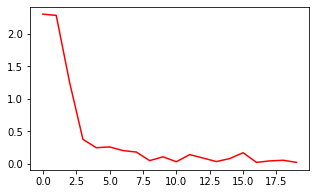

In [16]:
epochs = [i for i in range(epoch)]
plt.figure(figsize=(5,3))
plt.plot(epochs, errors, color='red')
plt.show()

From the above, the model has a  98.2% accuracy